# Career and Life Prospects in Europe: The Ideal Destination for Young Graduates

Matteo Grandesso - 865336

## Libraries

In [1]:
# Importazione delle Librerie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from scipy import stats
from sklearn.impute import KNNImputer

import os

import geopandas as gpd

import folium
from IPython.display import display, HTML

from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

import json
import requests

In [3]:
# Configurazione di base per le visualizzazioni
# plt.style.use([el for el in plt.style.available if 'seaborn' in el][0])
plt.style.use([el for el in plt.style.available if 'whitegrid' in el][0])
plt.rcParams["figure.dpi"] = 100 
plt.rcParams["figure.figsize"] = (10, 6)

## Data

In [3]:
df = pd.read_excel('datasciencelab.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 78 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   NUTS                                                                                234 non-null    object 
 1   Region name                                                                         234 non-null    object 
 2   Corruption                                                                          232 non-null    float64
 3   Quality and accountability                                                          232 non-null    float64
 4   Impartiality                                                                        232 non-null    float64
 5   Individuals who used the internet for interaction with public authorities           234 non-null   

In [4]:
df.describe()

,Corruption,Quality and accountability,Impartiality,Individuals who used the internet for interaction with public authorities,Presence of corruption in the national public institutions in the country,Presence of corruption in the local or regional public institutions in the country,Ease of doing business,Property rights,Intellectual property protection,Efficiency of legal framework in settling disputes,...,Design applications,Sales of new-to-market and new-to-firms innovation,Inhabitants 2018,Inhabitants 2019,Inhabitants 2020,Avarage Inhabitants,GDP per capita 2018,GDP per capita 2019,GDP per capita 2020,Avarage GDP per capita
count,232.000000,232.000000,232.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000,234.000000
mean,-0.013654,-0.006217,-0.017340,65.834681,0.718034,0.700726,76.483637,4.973684,5.038868,3.978631,...,97.589122,95.901282,1.908999e+06,1.913018e+06,1.914772e+06,1.911145e+06,93.554116,93.224263,93.451361,93.409913
std,1.003233,1.007672,1.007112,19.737550,0.144897,0.145628,3.517834,0.702907,0.707010,1.055798,...,49.167774,32.906459,1.662922e+06,1.669624e+06,1.672997e+06,1.669657e+06,35.931457,35.318796,36.662498,35.898892
min,-2.315000,-2.524000,-2.325000,12.000000,0.340000,0.320000,66.139410,3.752105,3.699662,1.874859,...,0.000000,15.660907,2.964000e+04,2.984000e+04,3.001000e+04,2.983000e+04,27.853198,28.450684,29.735508,28.679797
25%,-0.821250,-0.730750,-0.924000,53.250000,0.590000,0.590000,73.620960,4.379064,4.609926,3.026567,...,60.857494,77.163161,8.637100e+05,8.708000e+05,8.722438e+05,8.700583e+05,67.722118,68.834426,68.318967,68.549180
50%,-0.009000,0.234500,0.222500,67.000000,0.730000,0.690000,76.517510,4.946868,5.117581,3.965192,...,96.504377,98.168248,1.476825e+06,1.479820e+06,1.481881e+06,1.479509e+06,87.082855,87.608854,87.772123,87.264937
75%,0.873000,0.786000,0.828474,83.750000,0.830000,0.820000,79.676565,5.310810,5.654187,4.836490,...,130.331591,116.701823,2.334738e+06,2.340295e+06,2.343245e+06,2.340230e+06,113.794005,112.033998,112.773100,111.474354
max,1.828000,2.142000,2.378000,96.000000,0.910000,0.930000,85.288560,6.602053,6.533043,5.959218,...,204.982748,167.322164,1.228088e+07,1.232871e+07,1.237277e+07,1.232745e+07,261.502558,254.347470,271.880884,259.658990


## Missing value management

In [4]:
missing_values =  {
    "Column name": [],
    "Missing values": [],
    "Missing values %": []
}
for el in df.columns:
    if df[el].isnull().sum() > 0:
        missing_values["Column name"].append(el)
        missing_values["Missing values"].append(df[el].isnull().sum())
        missing_values["Missing values %"].append(df[el].isnull().sum() / (df.shape[0]*df.shape[1]) * 100)

print(f"Shape of dataframe : {df.shape[0]} rows and {df.shape[1]} columns")
missing_values = pd.DataFrame(missing_values).set_index("Column name")
print(f"Total number of missing values: {missing_values['Missing values'].sum()} ({round(missing_values['Missing values %'].sum(),2)}%)")
missing_values

Shape of dataframe : 234 rows and 78 columns
Total number of missing values: 108 (0.59%)


,Missing values,Missing values %
Column name,,
Corruption,2,0.010958
Quality and accountability,2,0.010958
Impartiality,2,0.010958
National savings,6,0.032873
Healthy life expectancy,1,0.005479
Low achievement in reading (15-year-olds),19,0.104098
Higher educational attainment,1,0.005479
Lifelong learning,1,0.005479
Early school leavers,12,0.065746


### KNN imputation

In [5]:
# separate the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_data = df[numeric_columns]

# Standardize the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Apply the KNN imputer
imputer = KNNImputer(n_neighbors=5)
numeric_data_imputed = imputer.fit_transform(numeric_data_scaled)

# Inverse the scaling and store the result in the DataFrame
df[numeric_columns] = scaler.inverse_transform(numeric_data_imputed)

df.head()

,NUTS,Region name,Corruption,Quality and accountability,Impartiality,Individuals who used the internet for interaction with public authorities,Presence of corruption in the national public institutions in the country,Presence of corruption in the local or regional public institutions in the country,Ease of doing business,Property rights,...,Design applications,Sales of new-to-market and new-to-firms innovation,Inhabitants 2018,Inhabitants 2019,Inhabitants 2020,Avarage Inhabitants,GDP per capita 2018,GDP per capita 2019,GDP per capita 2020,Avarage GDP per capita
0,AT_C,Vienna and its commuting zone,0.576955,0.564817,1.119228,81.659248,0.62,0.62,78.74549,6.171304,...,101.167919,93.866455,3565780.0,3583820.0,3602811.0,3.584137e+06,129.325205,128.208730,126.786797,128.106910
1,AT11,Burgenland,0.606000,0.770000,1.010000,77.000000,0.62,0.62,78.74549,6.171304,...,101.167919,93.866455,292960.0,293860.0,295095.0,3.242898e+04,89.510918,88.673545,88.459266,88.881243
2,AT21,Kärnten,0.576000,0.510000,1.073000,75.000000,0.62,0.62,78.74549,6.171304,...,140.535449,108.873203,560790.0,561070.0,561655.0,5.611717e+05,108.949543,107.894015,107.820447,108.221335
3,AT22,Steiermark,0.540000,0.657000,1.501000,77.000000,0.62,0.62,78.74549,6.171304,...,140.535449,108.873203,1241230.0,1244480.0,1247035.0,1.244248e+06,114.961434,115.225294,114.015215,114.733981
4,AT31,Oberösterreich,0.609000,0.549000,1.288000,76.000000,0.62,0.62,78.74549,6.171304,...,194.812193,112.586758,1477740.0,1486150.0,1493382.0,1.485757e+06,130.938672,128.944859,127.823069,129.235533


In [10]:
df.isnull().sum().sum()

0

In [6]:
# Dizionario di mapping: sigla (ISO) -> nome esteso in italiano
eu_mapping = {
    "AT": "Austria",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "HR": "Croatia",
    "CY": "Cyprus",
    "CZ": "Czech Republic",
    "DK": "Denmark",
    "EE": "Estonia",
    "FI": "Finland",
    "FR": "France",
    "DE": "Germany",
    "EL": "Greek",        
    "HU": "Hungary",
    "IE": "Ireland",
    "IT": "Italy",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "MT": "Malta",
    "NL": "Netherlands",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SK": "Slovakia",
    "SI": "Slovenia",
    "ES": "Spain",
    "SE": "Sweden"
}

df['nation_code'] = df['NUTS'].str[:2]
df['Nation'] = df['nation_code'].map(eu_mapping)

## POPULATION

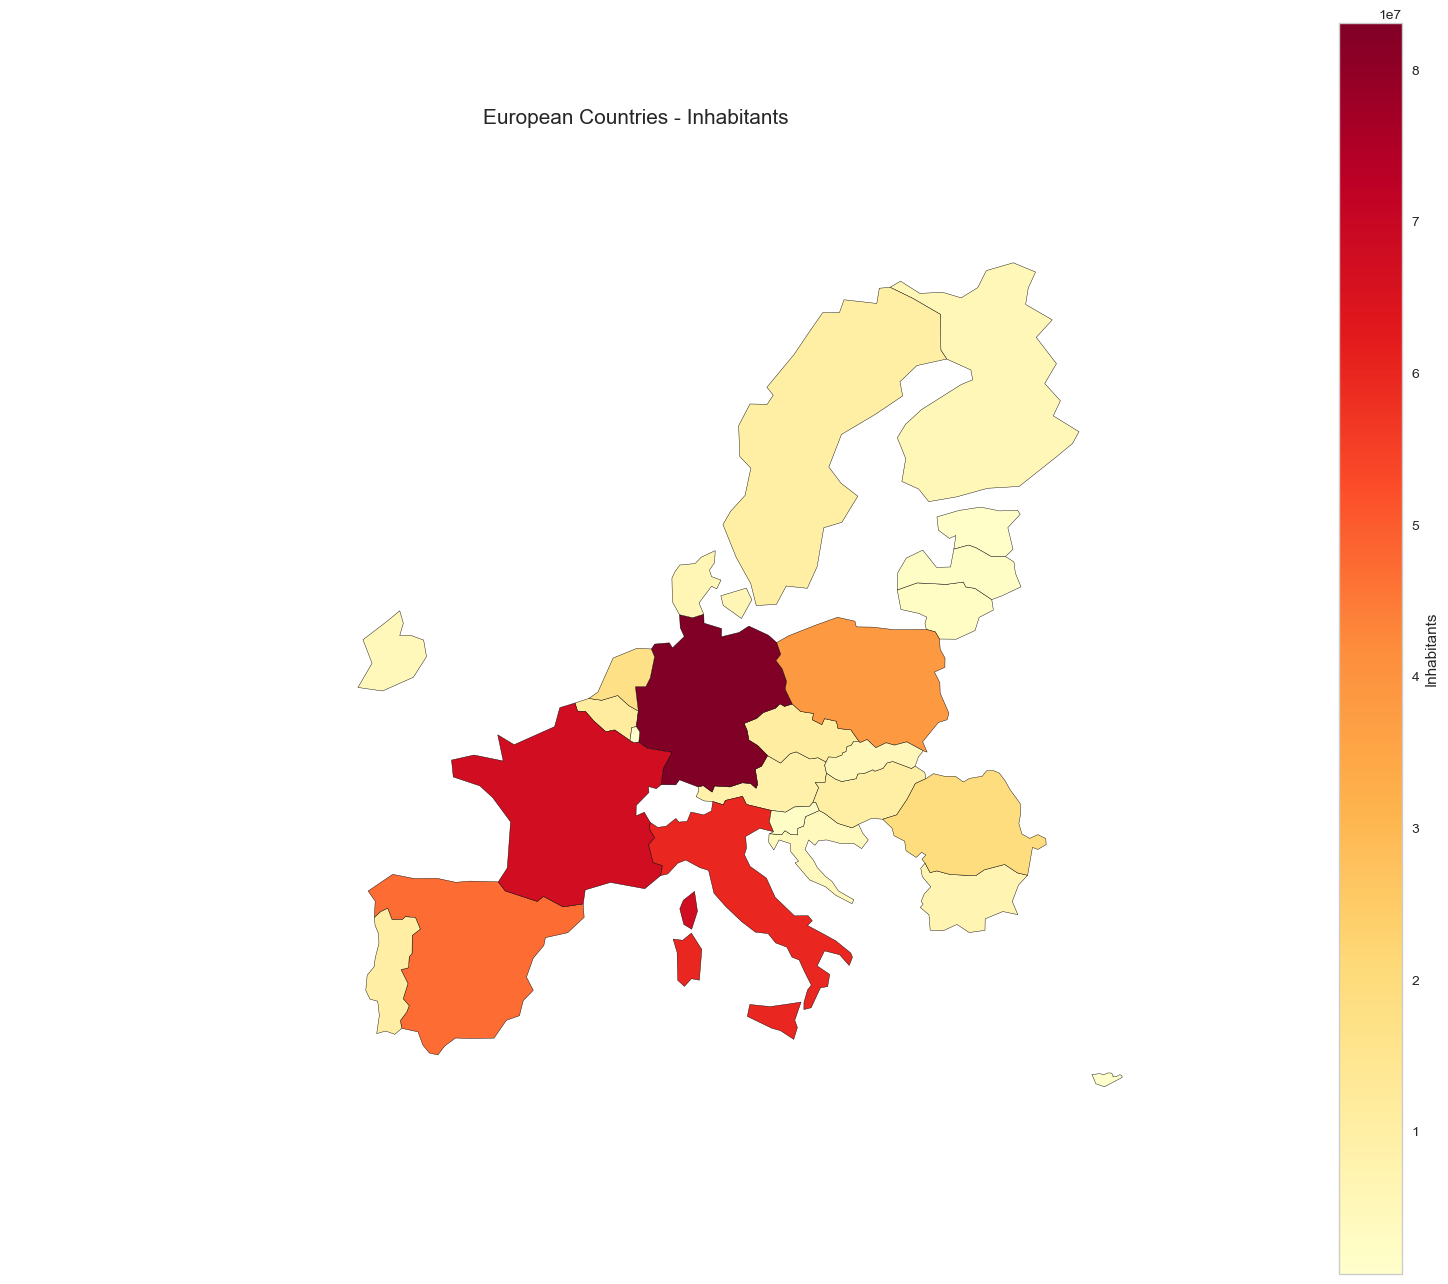

In [95]:
# First step: Carichiamo il GeoJSON del mondo
url_world = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
world = gpd.read_file(url_world)

# Second step: filtriamo i Paesi Europei + Cipro e Malta, escludendo la Russia
europe = world[((world['continent'] == 'Europe') | 
               (world['admin'].isin(['Cyprus', 'Malta']))) & 
              (world['admin'] != 'Russia')]

df_agg = df.groupby("Nation", as_index=False)['Inhabitants 2019'].sum()

# Third step: Uniamo il GeoDataFrame europe con df 
europe_merged = europe.merge(df_agg, how='left', left_on='admin', right_on='Nation')

fig, ax = plt.subplots(1, 1, figsize=(16, 13))

# Plot principale
europe_merged.plot(
    column='Inhabitants 2019',  
    cmap='YlOrRd',  
    legend=True,
    edgecolor='black',
    ax=ax,
    legend_kwds={'label': 'Inhabitants',
                 'orientation': 'vertical'}
)

ax.set_title("European Countries - Inhabitants", fontsize=15, pad=19)
ax.axis('off')  

ax.set_xlim([-30, 42])  # Longitudine
ax.set_ylim([32, 75])   # Latitudine 

plt.tight_layout()
plt.show()

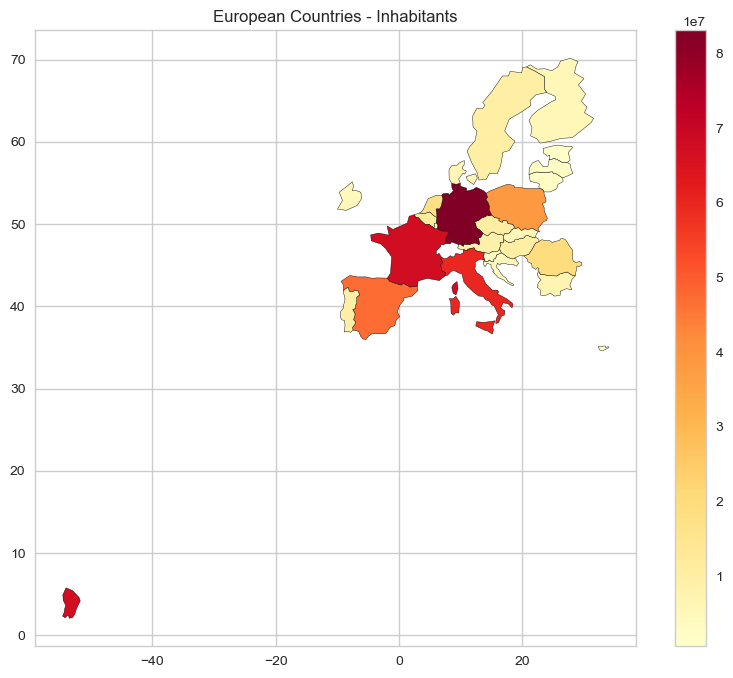

In [90]:
# First step: Carichiamo il GeoJSON del mondo
url_world = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
world = gpd.read_file(url_world)

# Second step: filtriamo solo i Paesi Europei tolta la Russia
europe = world[((world['continent'] == 'Europe') | 
               (world['admin'].isin(['Cyprus', 'Malta']))) & 
              (world['admin'] != 'Russia')]

df_agg = df.groupby("Nation", as_index=False)['Inhabitants 2019'].sum()

# Third step: Uniamo il GeoDataFrame europe con df 
europe_merged = europe.merge(df_agg, how='left', left_on='admin', right_on='Nation')

ax = europe_merged.plot(
    column='Inhabitants 2019',  
    cmap='YlOrRd',
    legend=True,
    edgecolor='black',
    figsize=(10, 8)
)

ax.set_title("European Countries - Inhabitants")
plt.show()

## HEALTH

### Health life expectancy

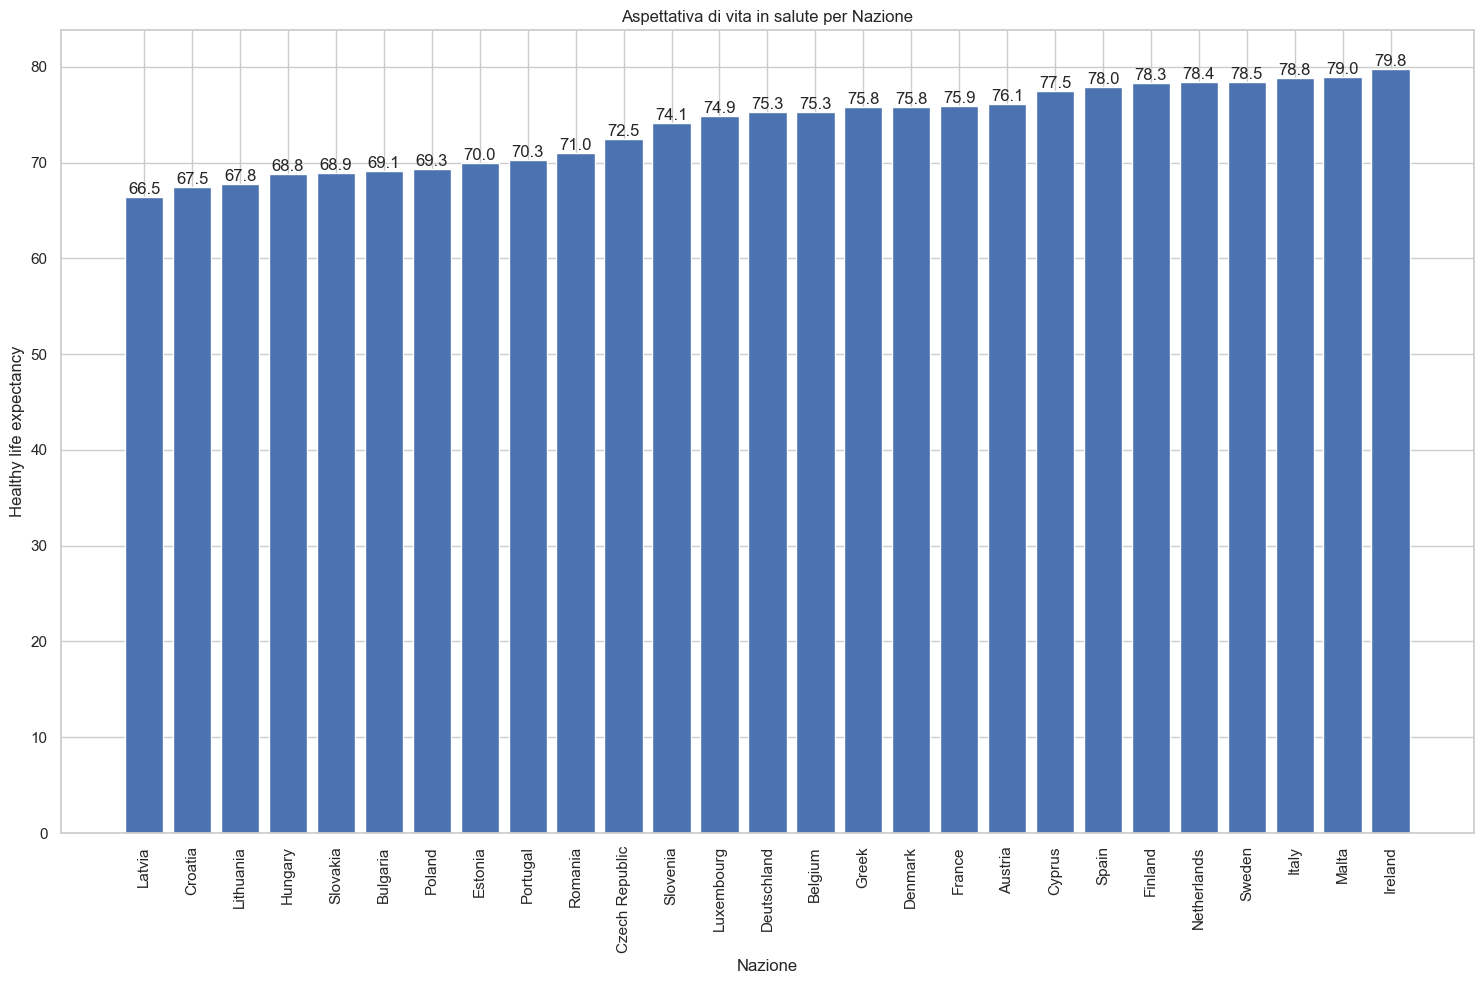

In [29]:
grouped_df = df.groupby('Nation')['Healthy life expectancy'].mean().sort_values(ascending=True)

# Histogram
plt.figure(figsize=(15, 10))
bars = plt.bar(range(len(grouped_df)), grouped_df.values)

plt.xticks(range(len(grouped_df)), grouped_df.index, rotation=90)
plt.xlabel('Nazione')
plt.ylabel('Healthy life expectancy')
plt.title('Aspettativa di vita in salute per Nazione')

for i, v in enumerate(grouped_df.values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Correlation between heart disease death rate and cancer disease death rate

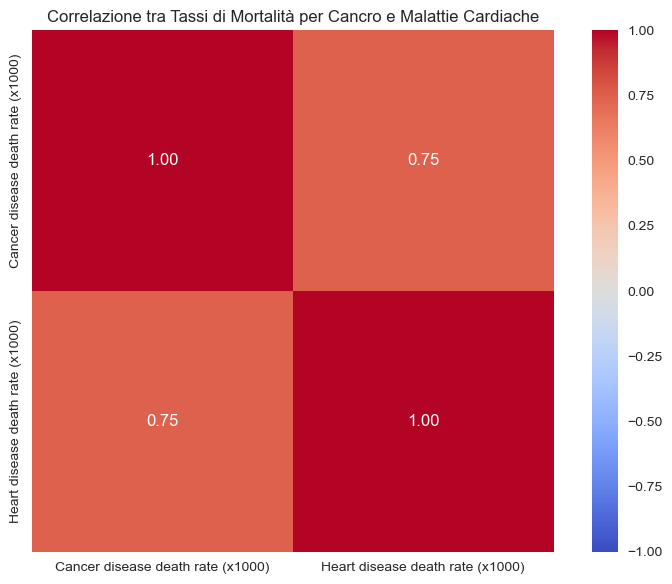

In [38]:
# Variable selection
disease_vars = [
    'Cancer disease death rate (x1000)',
    'Heart disease death rate (x1000)'
]
# Correlation matrix
correlation_matrix = df[disease_vars].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    vmin=-1,
    vmax=1
)

plt.title('Correlazione tra Tassi di Mortalità per Cancro e Malattie Cardiache')
plt.tight_layout()
plt.show()

## Correlazion between health variables

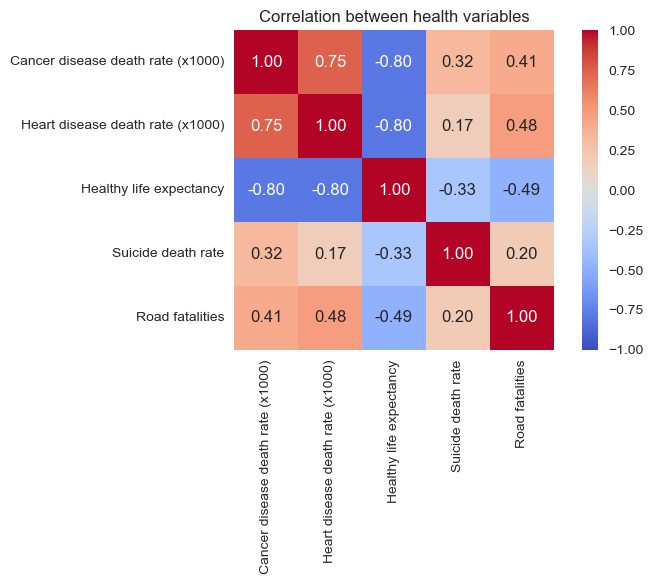

In [39]:
# Variable selection
disease_vars = [
    'Cancer disease death rate (x1000)',
    'Heart disease death rate (x1000)',
    'Healthy life expectancy',
    'Suicide death rate',
    'Road fatalities'
]
# correlation matrix
correlation_matrix = df[disease_vars].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    vmin=-1,
    vmax=1
)

plt.title('Correlation between health variables')
plt.tight_layout()
plt.show()

## Suicide death rate

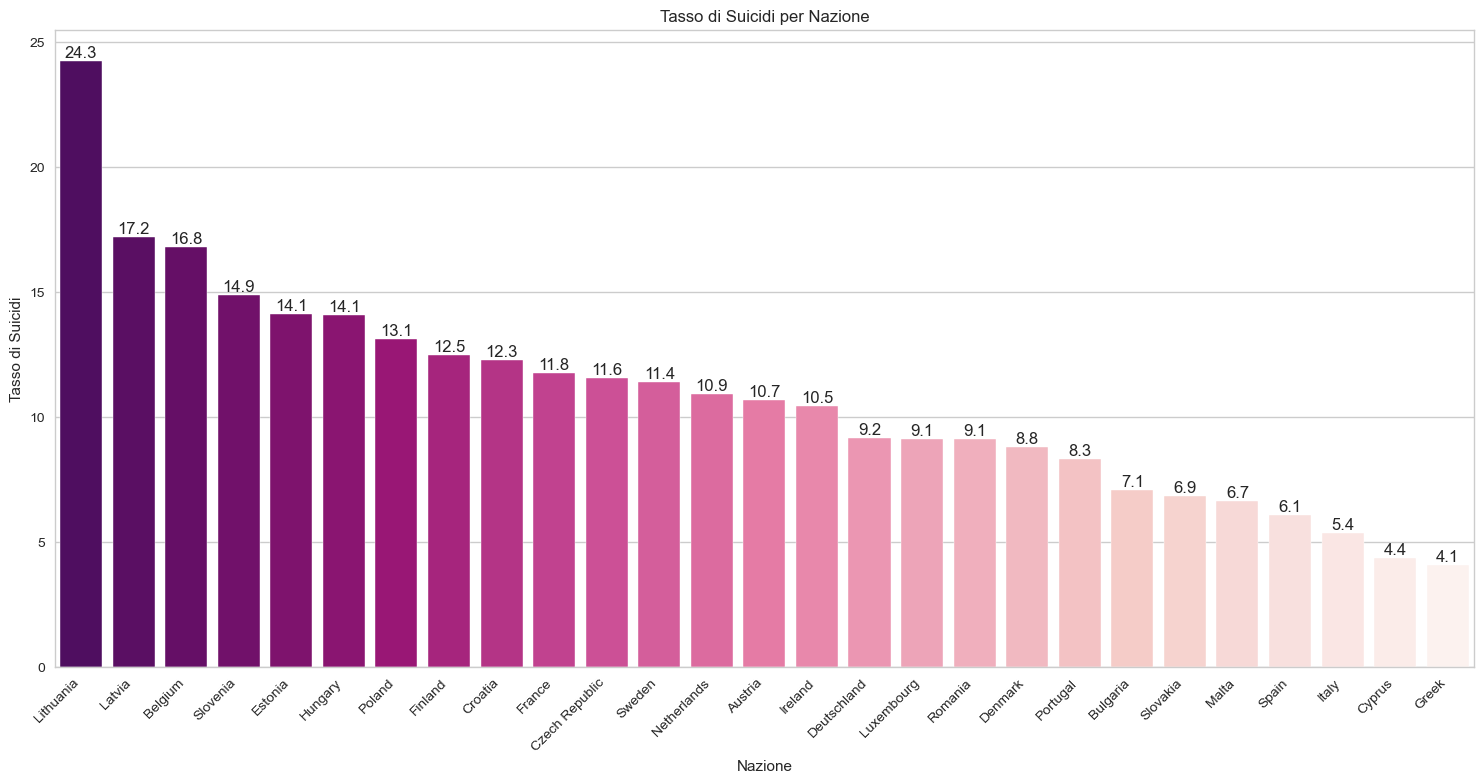

In [37]:
suicide_rate = df.groupby('Nation')['Suicide death rate'].mean().sort_values(ascending=False)

# Histogram
plt.figure(figsize=(15, 8))
sns.barplot(x=suicide_rate.index, 
            y=suicide_rate.values,
            palette='RdPu_r')

plt.title('Tasso di Suicidi per Nazione')
plt.xlabel('Nazione')
plt.ylabel('Tasso di Suicidi')
plt.xticks(rotation=45, horizontalalignment='right')

for i, v in enumerate(suicide_rate.values):
    plt.text(i, v, f'{v:.1f}', horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()

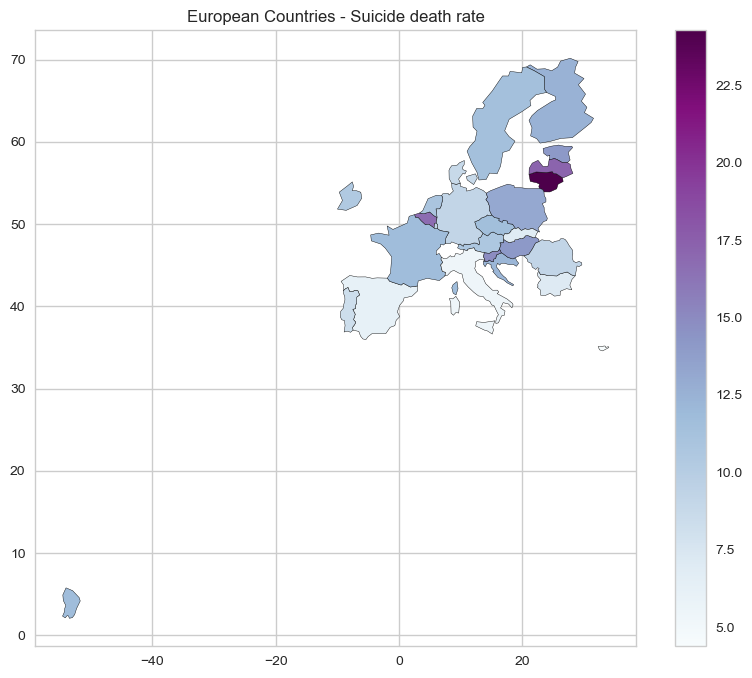

In [84]:
# First step: Carichiamo il GeoJSON del mondo
url_world = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
world = gpd.read_file(url_world)

# Second step: filtriamo i Paesi Europei + Cipro e Malta, escludendo la Russia
europe = world[((world['continent'] == 'Europe') | 
               (world['admin'].isin(['Cyprus', 'Malta']))) & 
              (world['admin'] != 'Russia')]

# Calcolo media tasso suicidi per nazione
df_agg = df.groupby("Nation", as_index=False)['Suicide death rate'].mean()

# Third step: Uniamo il GeoDataFrame europe con df 
europe_merged = europe.merge(df_agg, how='left', left_on='admin', right_on='Nation')

# Plot
ax = europe_merged.plot(
    column='Suicide death rate',  
    cmap='BuPu',  
    legend=True,
    edgecolor='black',
    figsize=(10, 8)
)

ax.set_title("European Countries - Suicide death rate")
plt.show()

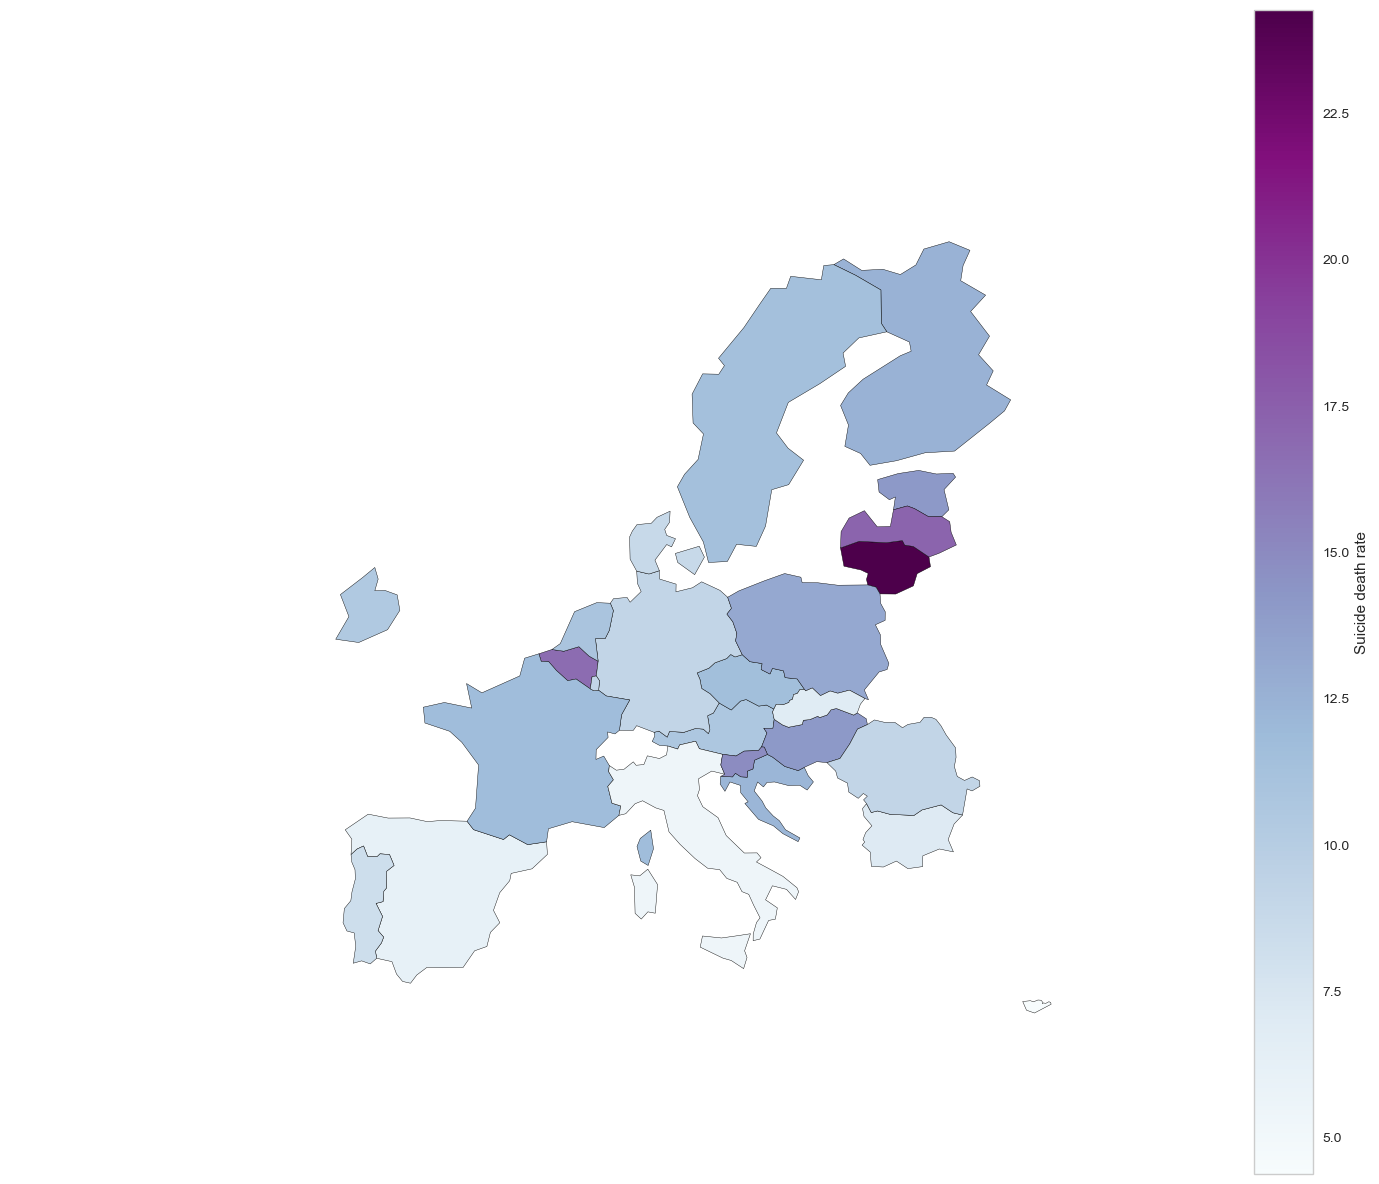

In [103]:
# First step: Carichiamo il GeoJSON del mondo
url_world = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
world = gpd.read_file(url_world)

# Second step: filtriamo i Paesi Europei + Cipro e Malta, escludendo la Russia
europe = world[((world['continent'] == 'Europe') | 
               (world['admin'].isin(['Cyprus', 'Malta']))) & 
              (world['admin'] != 'Russia')]

df_agg = df.groupby("Nation", as_index=False)['Suicide death rate'].mean()

# Third step: Uniamo il GeoDataFrame europe con df 
europe_merged = europe.merge(df_agg, how='left', left_on='admin', right_on='Nation')

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Plot principale
europe_merged.plot(
    column='Suicide death rate',  
    cmap='BuPu',  
    legend=True,
    edgecolor='black',
    ax=ax,
    legend_kwds={'label': 'Suicide death rate',
                 'orientation': 'vertical'}
)

ax.axis('off')  # Rimuove gli assi

ax.set_xlim([-30, 42])  # Longitudine
ax.set_ylim([33, 75])   # Latitudine 

plt.tight_layout()
plt.show()

## Road fatalities

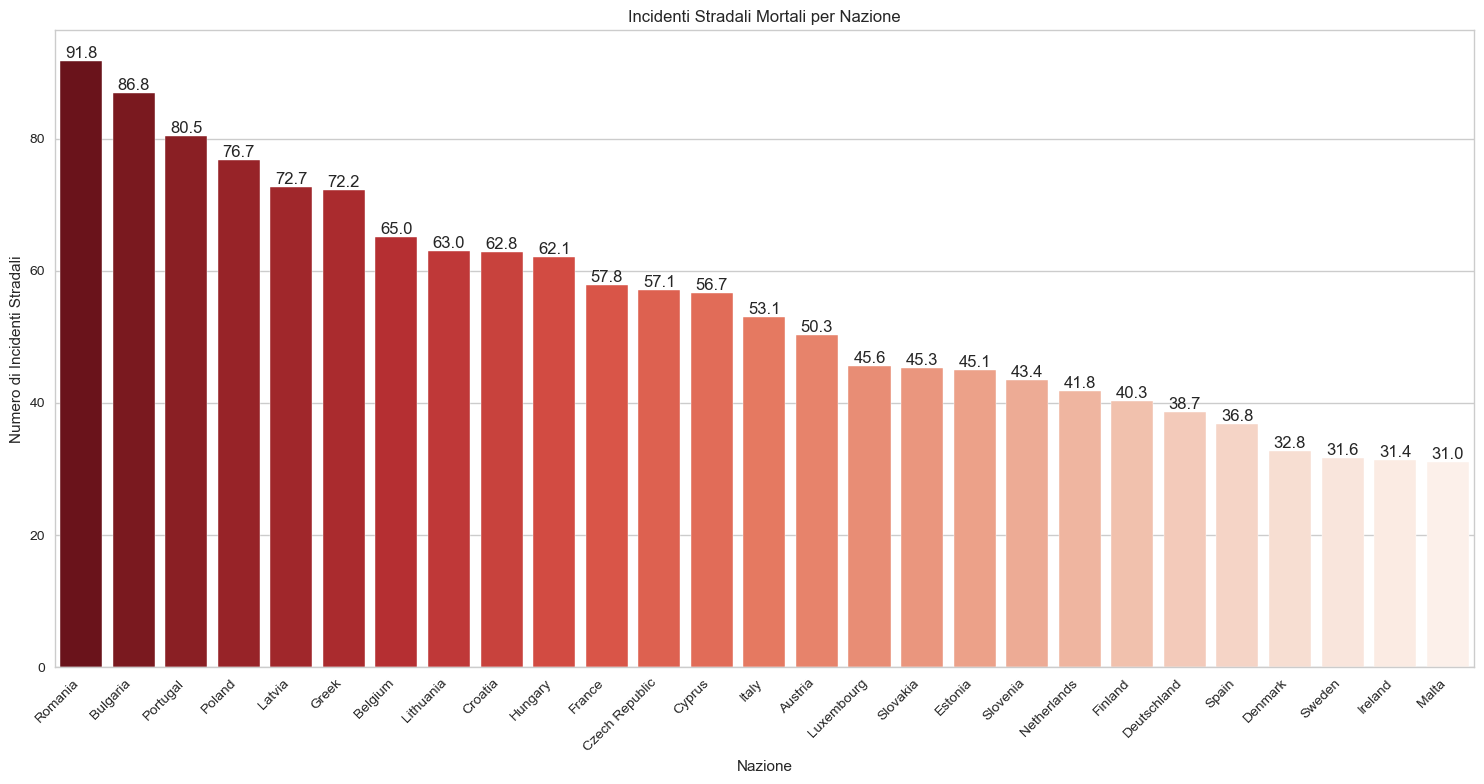

In [36]:
road_fatalities = df.groupby('Nation')['Road fatalities'].mean().sort_values(ascending=False)

# Histogram
plt.figure(figsize=(15, 8))
sns.barplot(x=road_fatalities.index, 
            y=road_fatalities.values,
            palette='Reds_r')

plt.title('Incidenti Stradali Mortali per Nazione')
plt.xlabel('Nazione')
plt.ylabel('Numero di Incidenti Stradali')
plt.xticks(rotation=45, horizontalalignment='right')

for i, v in enumerate(road_fatalities.values):
    plt.text(i, v, f'{v:.1f}', horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()

## ECONOMY

## Gini Index on GDP

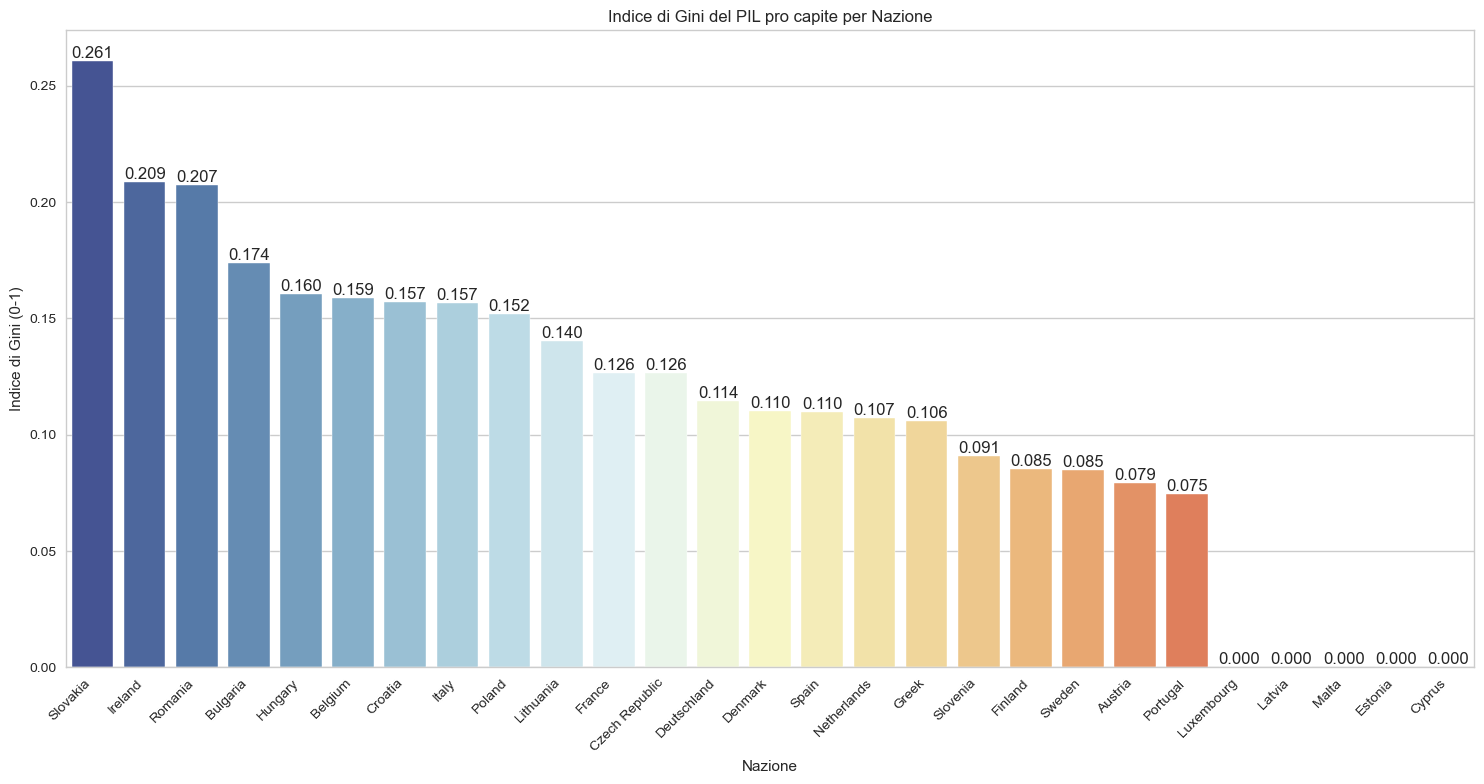

In [41]:
# Definition of Gini index
def gini(array):
    array = np.array(array).flatten()
    if len(array) == 0 or np.sum(array) == 0:
        return 0
    # Ordina l'array
    array = np.sort(array)
    n = len(array)
    index = np.arange(1, n + 1)
    # Formula corretta per Gini normalizzato
    return ((2 * np.sum(index * array)) / (n * np.sum(array))) - (n + 1) / n

gini_indices = {}
for nation in df['Nation'].unique():
    values = df[df['Nation'] == nation]['Avarage GDP per capita'].values
    gini_indices[nation] = gini(values)

gini_series = pd.Series(gini_indices).sort_values(ascending=False)

# Histogram
plt.figure(figsize=(15, 8))
sns.barplot(x=gini_series.index, 
            y=gini_series.values,
            palette='RdYlBu_r')

plt.title('Indice di Gini del PIL pro capite per Nazione')
plt.xlabel('Nazione')
plt.ylabel('Indice di Gini (0-1)')
plt.xticks(rotation=45, horizontalalignment='right')

for i, v in enumerate(gini_series.values):
    plt.text(i, v, f'{v:.3f}', horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()

## Potential Market size

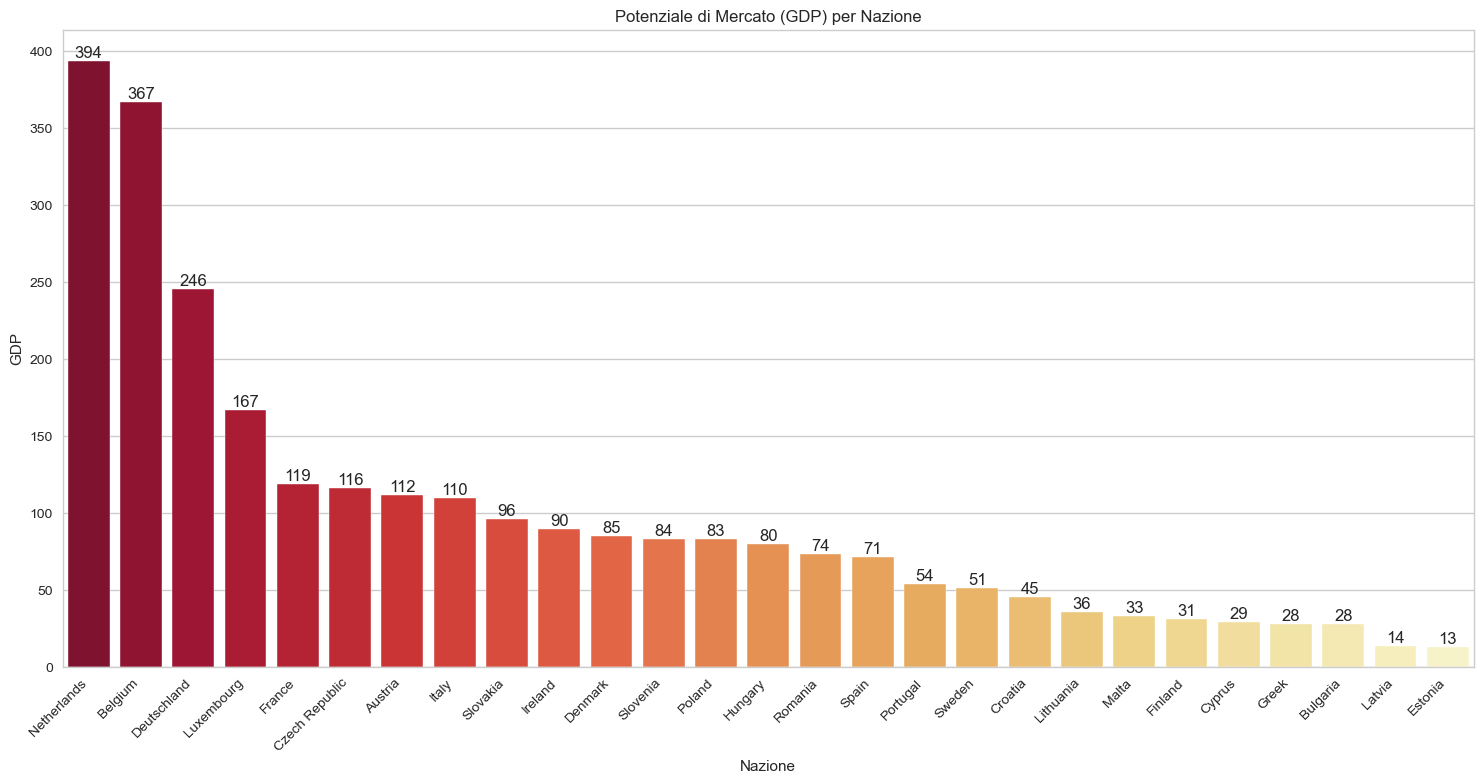

In [42]:
market_size = df.groupby('Nation')['Potential market size expressed in GDP'].mean().sort_values(ascending=False)

# Histogram
plt.figure(figsize=(15, 8))
sns.barplot(x=market_size.index, 
            y=market_size.values,
            palette='YlOrRd_r')

plt.title('Potenziale di Mercato (GDP) per Nazione')
plt.xlabel('Nazione')
plt.ylabel('GDP')
plt.xticks(rotation=45, horizontalalignment='right')

for i, v in enumerate(market_size.values):
    plt.text(i, v, f'{v:.0f}', horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()

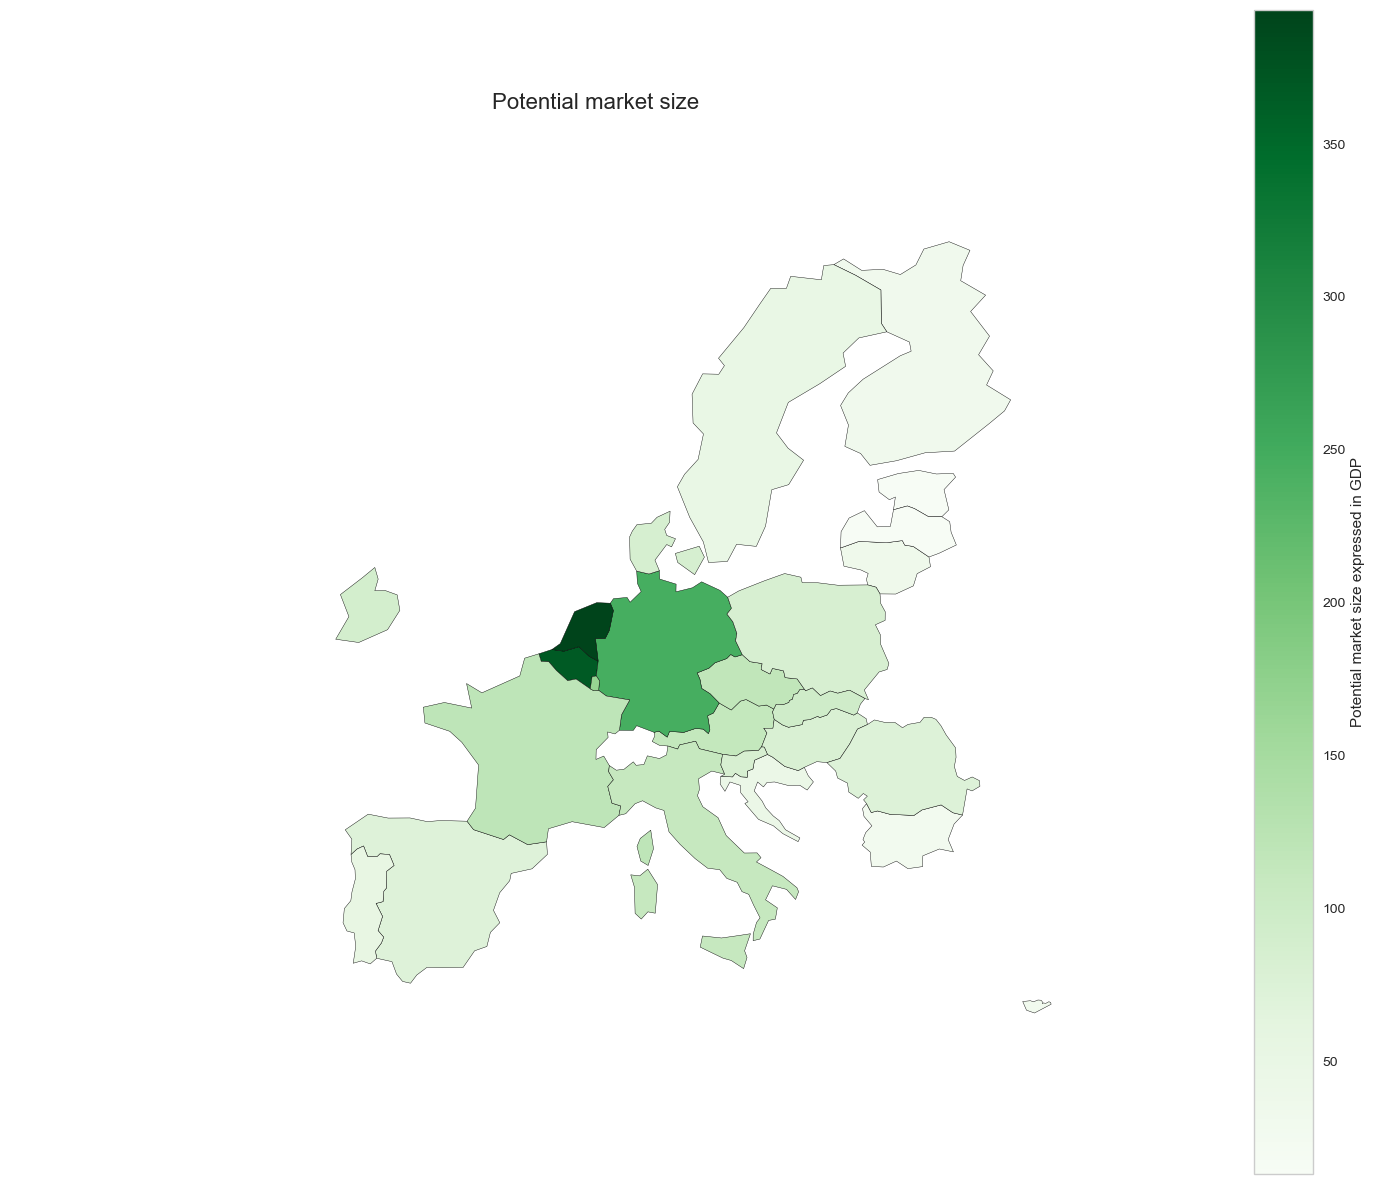

In [99]:
# First step: Carichiamo il GeoJSON del mondo
url_world = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
world = gpd.read_file(url_world)

# Second step: filtriamo i Paesi Europei + Cipro e Malta, escludendo la Russia
europe = world[((world['continent'] == 'Europe') | 
               (world['admin'].isin(['Cyprus', 'Malta']))) & 
              (world['admin'] != 'Russia')]

df_agg = df.groupby("Nation", as_index=False)['Potential market size expressed in GDP'].mean()

# Third step: Uniamo il GeoDataFrame europe con df 
europe_merged = europe.merge(df_agg, how='left', left_on='admin', right_on='Nation')

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Plot principale
europe_merged.plot(
    column='Potential market size expressed in GDP',  
    cmap='Greens',  
    legend=True,
    edgecolor='black',
    ax=ax,
    legend_kwds={'label': 'Potential market size expressed in GDP',
                 'orientation': 'vertical'}
)

ax.set_title("Potential market size", fontsize=16, pad=20)
ax.axis('off')

ax.set_xlim([-30, 42])  # Longitudine
ax.set_ylim([33, 75])   # Latitudine 

plt.tight_layout()
plt.show()

## Relationship between Public debt and GDP

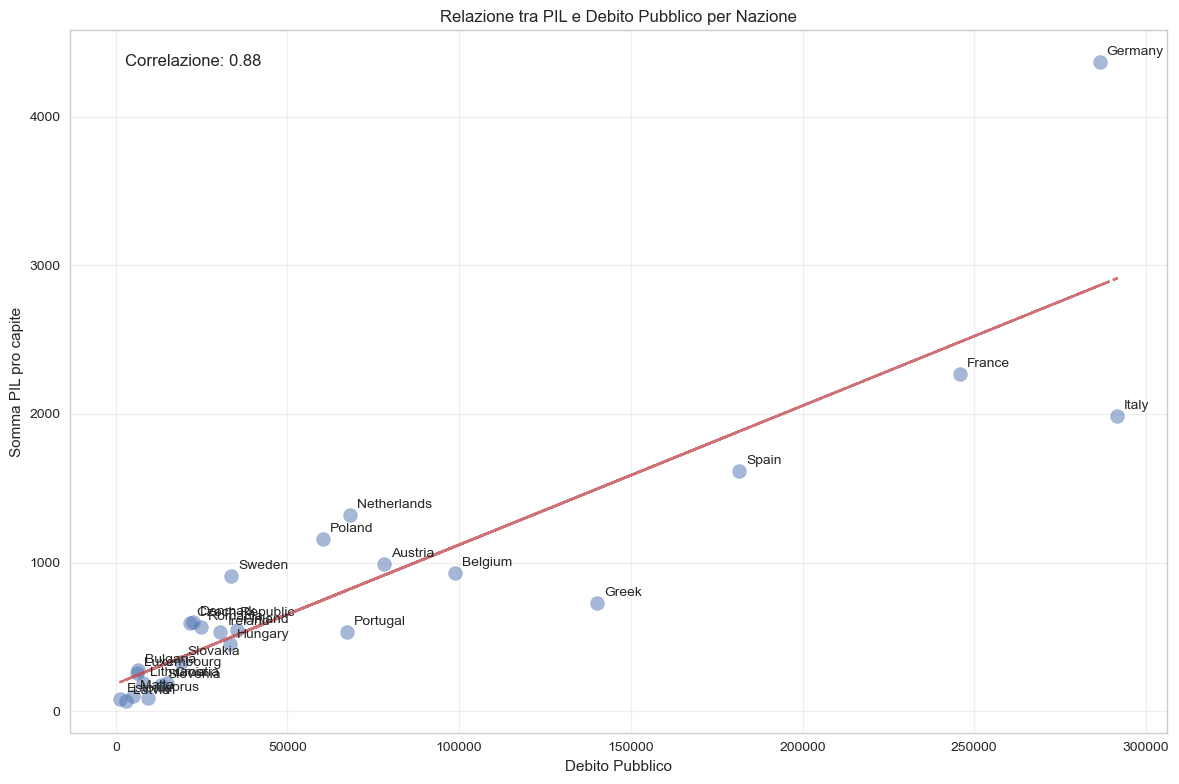

In [ ]:
gdp_sum = df.groupby('Nation')['Avarage GDP per capita'].sum()
debt_mean = df.groupby('Nation')['Government debt'].mean()

debt_gdp_product = debt_mean * gdp_sum #Debito pubblico

plot_data = pd.DataFrame({
    'GDP_sum': gdp_sum,
    'Debt_GDP_Product': debt_gdp_product
})

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_data['Debt_GDP_Product'], 
           plot_data['GDP_sum'], 
           alpha=0.5, 
           s=100)

# linear regression
z = np.polyfit(plot_data['Debt_GDP_Product'], plot_data['GDP_sum'], 1)
p = np.poly1d(z)
plt.plot(plot_data['Debt_GDP_Product'], 
         p(plot_data['Debt_GDP_Product']), 
         "r--", 
         alpha=0.8)

for idx in plot_data.index:
    plt.annotate(idx, 
                (plot_data.loc[idx, 'Debt_GDP_Product'], 
                 plot_data.loc[idx, 'GDP_sum']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=10)


plt.title('Relazione tra PIL e Debito Pubblico per Nazione')
plt.xlabel('Debito Pubblico')
plt.ylabel('Somma PIL pro capite')

# Correlation
correlation = plot_data['Debt_GDP_Product'].corr(plot_data['GDP_sum'])
plt.text(0.05, 0.95, f'Correlazione: {correlation:.2f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Public Debt

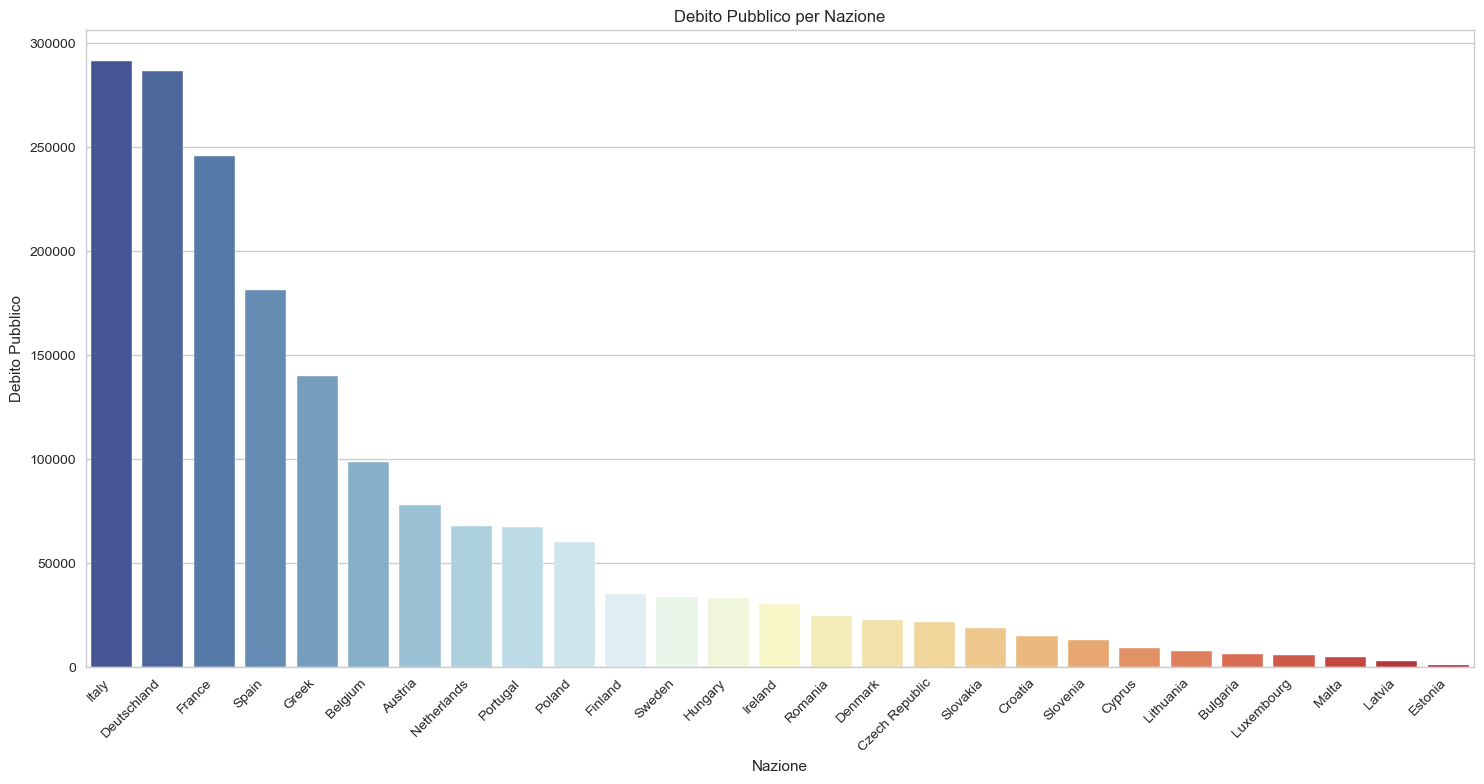

In [43]:
gdp_sum = df.groupby('Nation')['Avarage GDP per capita'].sum()
debt_mean = df.groupby('Nation')['Government debt'].mean()
debt_gdp_product = (debt_mean * gdp_sum).sort_values(ascending=False)

# Histogram
plt.figure(figsize=(15, 8))
sns.barplot(x=debt_gdp_product.index, 
            y=debt_gdp_product.values,
            palette='RdYlBu_r')


plt.title('Debito Pubblico per Nazione')
plt.xlabel('Nazione')
plt.ylabel('Debito Pubblico')
plt.xticks(rotation=45, horizontalalignment='right')


plt.tight_layout()
plt.show()

### Disposable income per capita

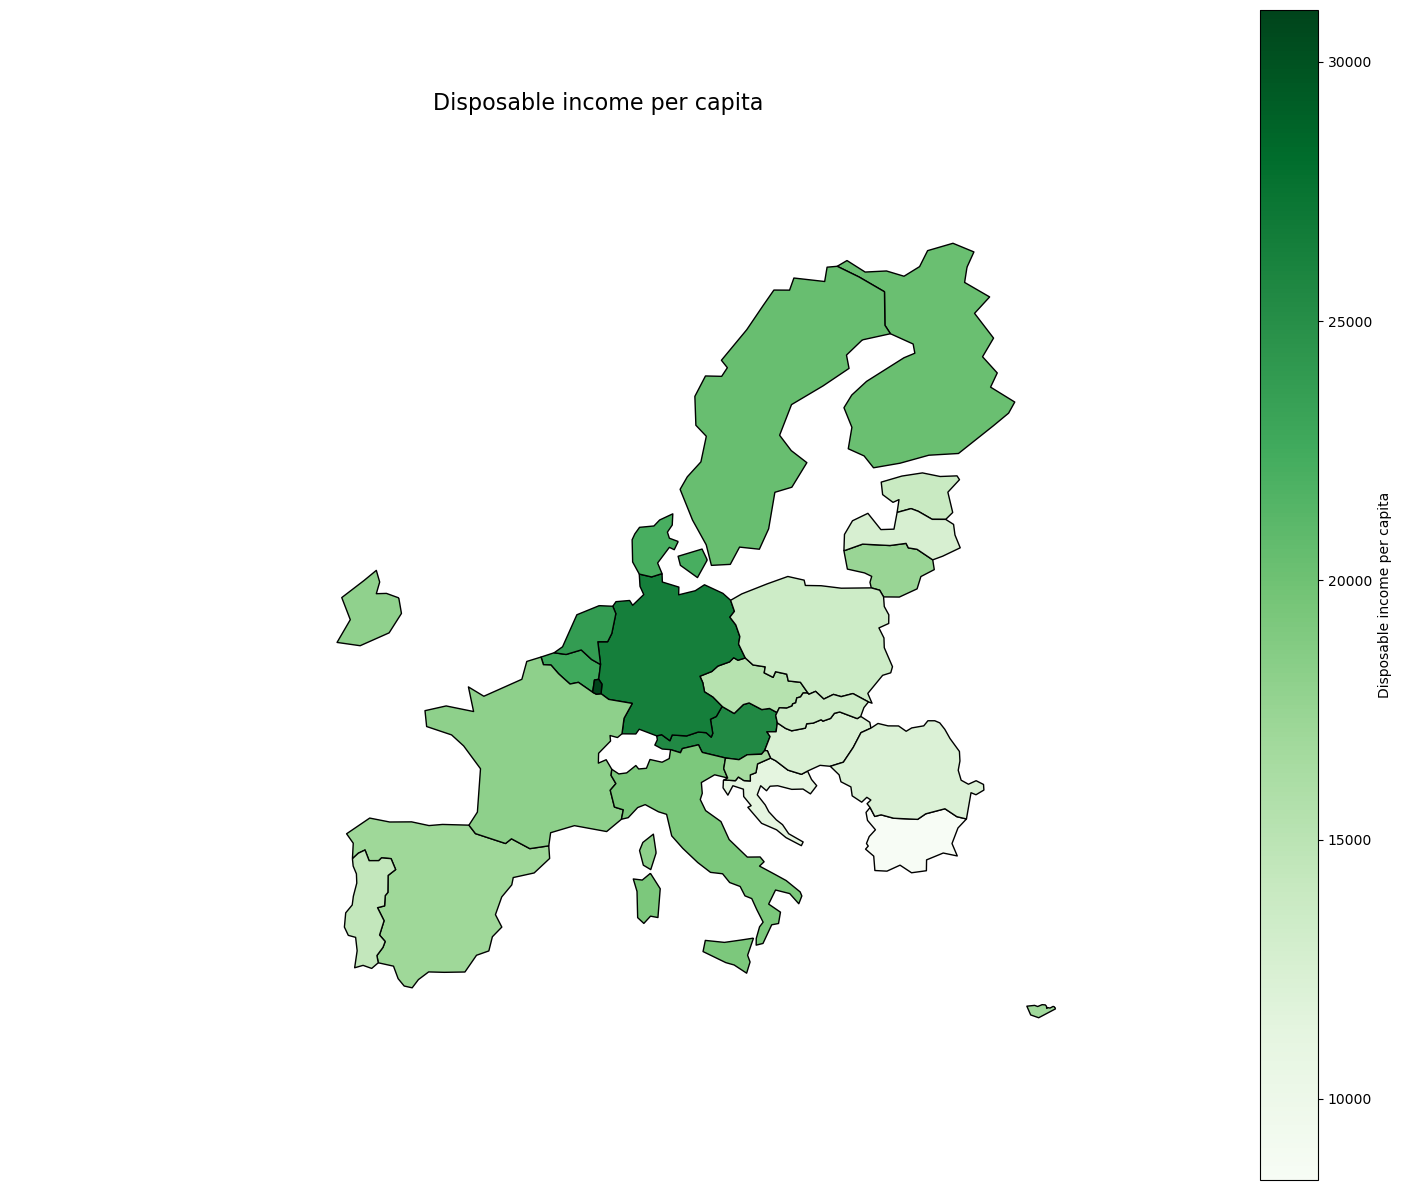

In [12]:
url_world = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
response = requests.get(url_world)
with tempfile.NamedTemporaryFile(suffix='.geojson') as tmp:
    tmp.write(response.content)
    tmp.flush()
    world = gpd.read_file(tmp.name)


# Second step: filtriamo i Paesi Europei + Cipro e Malta, escludendo la Russia
europe = world[((world['continent'] == 'Europe') | 
               (world['admin'].isin(['Cyprus', 'Malta']))) & 
              (world['admin'] != 'Russia')]

df_agg = df.groupby("Nation", as_index=False)['Disposable income per capita'].mean()

# Third step: Uniamo il GeoDataFrame europe con df 
europe_merged = europe.merge(df_agg, how='left', left_on='admin', right_on='Nation')

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Plot principale
europe_merged.plot(
    column='Disposable income per capita',  
    cmap='Greens',  
    legend=True,
    edgecolor='black',
    ax=ax,
    legend_kwds={'label': 'Disposable income per capita',
                 'orientation': 'vertical'}
)

ax.set_title("Disposable income per capita", fontsize=16, pad=20)
ax.axis('off')

ax.set_xlim([-30, 42])  # Longitudine
ax.set_ylim([33, 75])   # Latitudine 

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

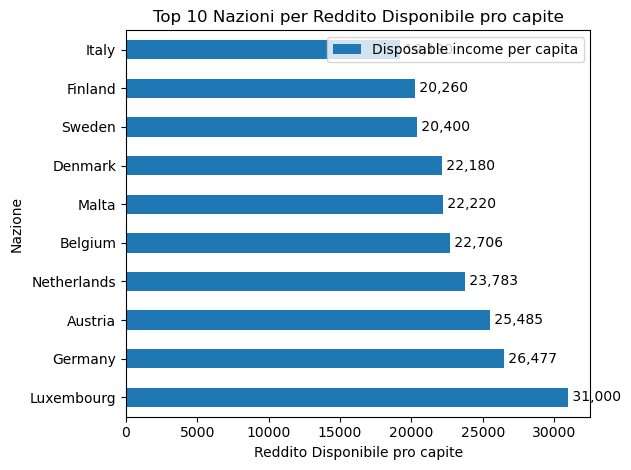

In [14]:
top_10_nations = df_agg.sort_values('Disposable income per capita', ascending=False).head(10)

# Crea il grafico a barre
plt.figure(figsize=(12, 6))
ax = top_10_nations.plot(
    kind='barh',
    x='Nation',
    y='Disposable income per capita'
)

# Aggiungi i valori alla fine delle barre
for i, v in enumerate(top_10_nations['Disposable income per capita']):
    ax.text(v, i, f' {v:,.0f}', va='center')

# Personalizza il grafico
plt.title('Top 10 Nazioni per Reddito Disponibile pro capite')
plt.xlabel('Reddito Disponibile pro capite')
plt.ylabel('Nazione')

plt.tight_layout()
plt.show()

## INFRASTRUCTURE

## Relationship between Road transport and Rail transport performance

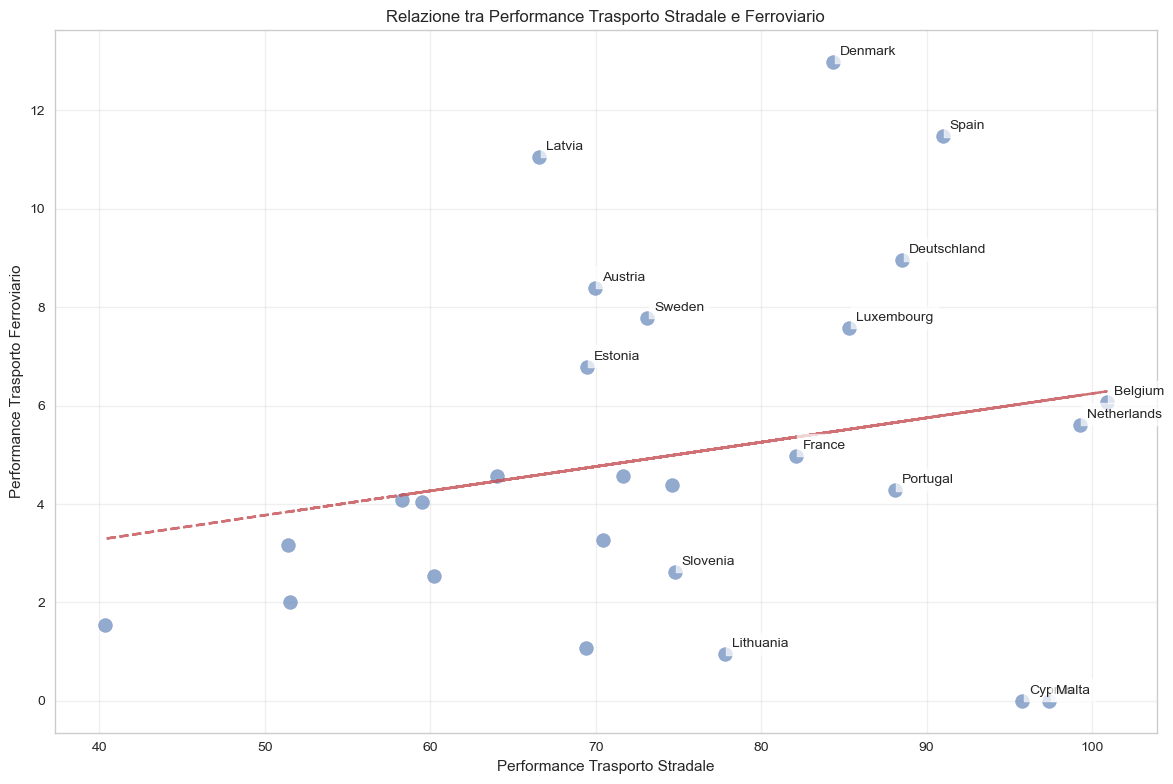

In [ ]:
transport_means = df.groupby('Nation')[['Road transport performance', 
                                             'Rail transport performance']].mean()


# Plot principale
plt.figure(figsize=(12, 8))
plt.scatter(transport_means['Road transport performance'], 
           transport_means['Rail transport performance'], 
           alpha=0.6, 
           s=100)

# linear regrrssion
z = np.polyfit(transport_means['Road transport performance'], 
               transport_means['Rail transport performance'], 1)
p = np.poly1d(z)
plt.plot(transport_means['Road transport performance'], 
         p(transport_means['Road transport performance']), 
         "r--", 
         alpha=0.8)

for idx in transport_means.index:
    if (transport_means.loc[idx, 'Road transport performance'] > transport_means['Road transport performance'].mean() or
        transport_means.loc[idx, 'Rail transport performance'] > transport_means['Rail transport performance'].mean()):
        plt.annotate(idx, 
                    (transport_means.loc[idx, 'Road transport performance'],
                     transport_means.loc[idx, 'Rail transport performance']),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.7))


plt.title('Relazione tra Performance Trasporto Stradale e Ferroviario')
plt.xlabel('Performance Trasporto Stradale')
plt.ylabel('Performance Trasporto Ferroviario')


plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Correlation between transport variables

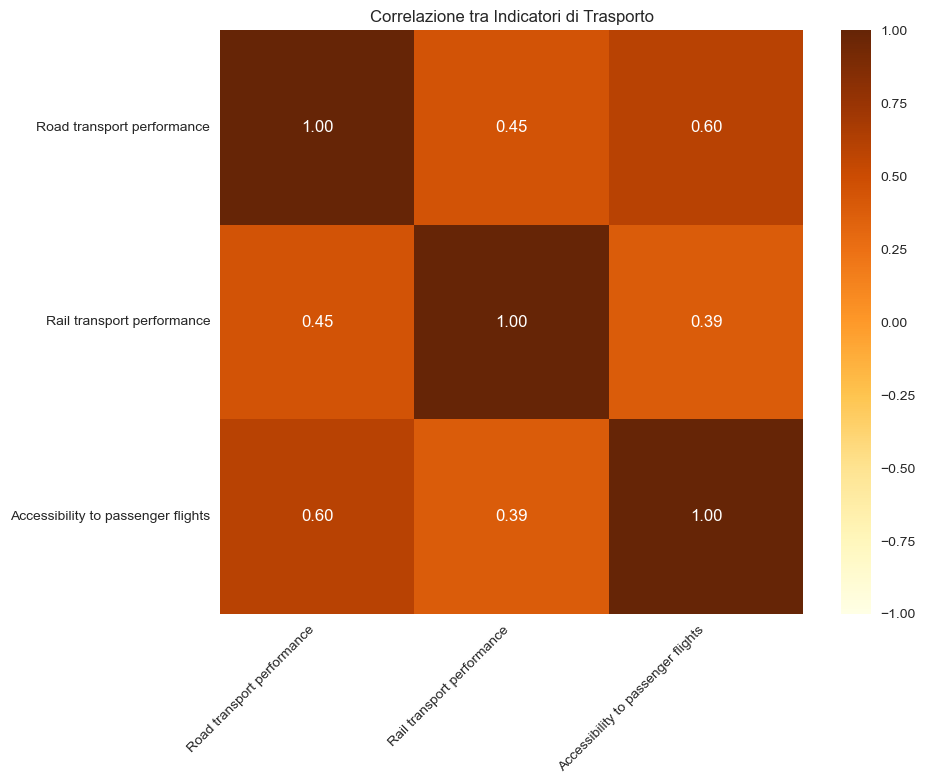

In [48]:
# Variable selection
transport_vars = [
    'Road transport performance',
    'Rail transport performance',
    'Accessibility to passenger flights'
]

# Correlation matrix
correlation_matrix = df[transport_vars].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='YlOrBr',  
    center=0,
    fmt='.2f',
    square=True,
    vmin=-1,
    vmax=1
)

plt.title('Correlazione tra Indicatori di Trasporto')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Flight accessibility

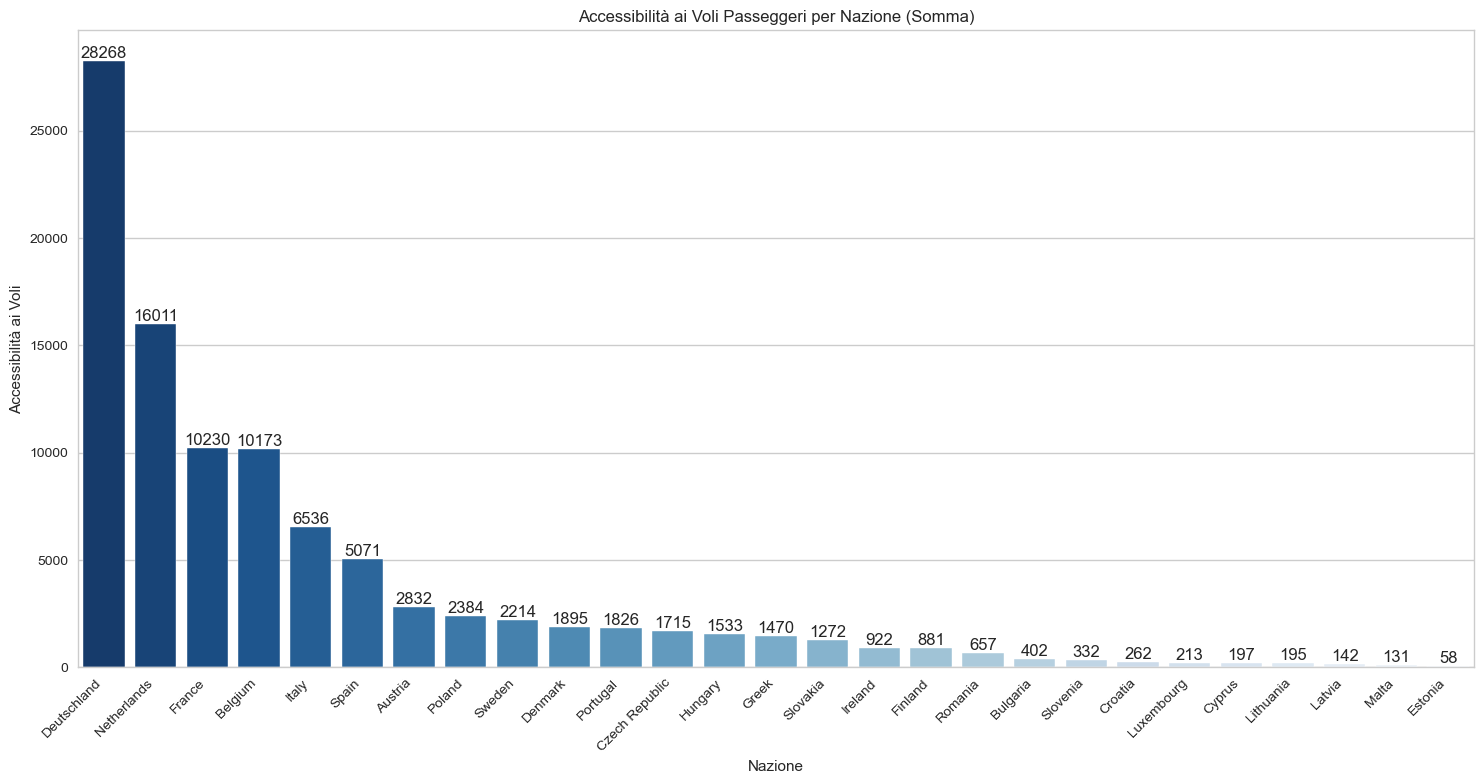

In [49]:
flights_sum = df.groupby('Nation')['Accessibility to passenger flights'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=flights_sum.index, 
            y=flights_sum.values,
            palette='Blues_r')

plt.title('Accessibilità ai Voli Passeggeri per Nazione (Somma)')
plt.xlabel('Nazione')
plt.ylabel('Accessibilità ai Voli')
plt.xticks(rotation=45, horizontalalignment='right')


for i, v in enumerate(flights_sum.values):
    plt.text(i, v, f'{v:.0f}', horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()


# EDUCATION

## Educational index

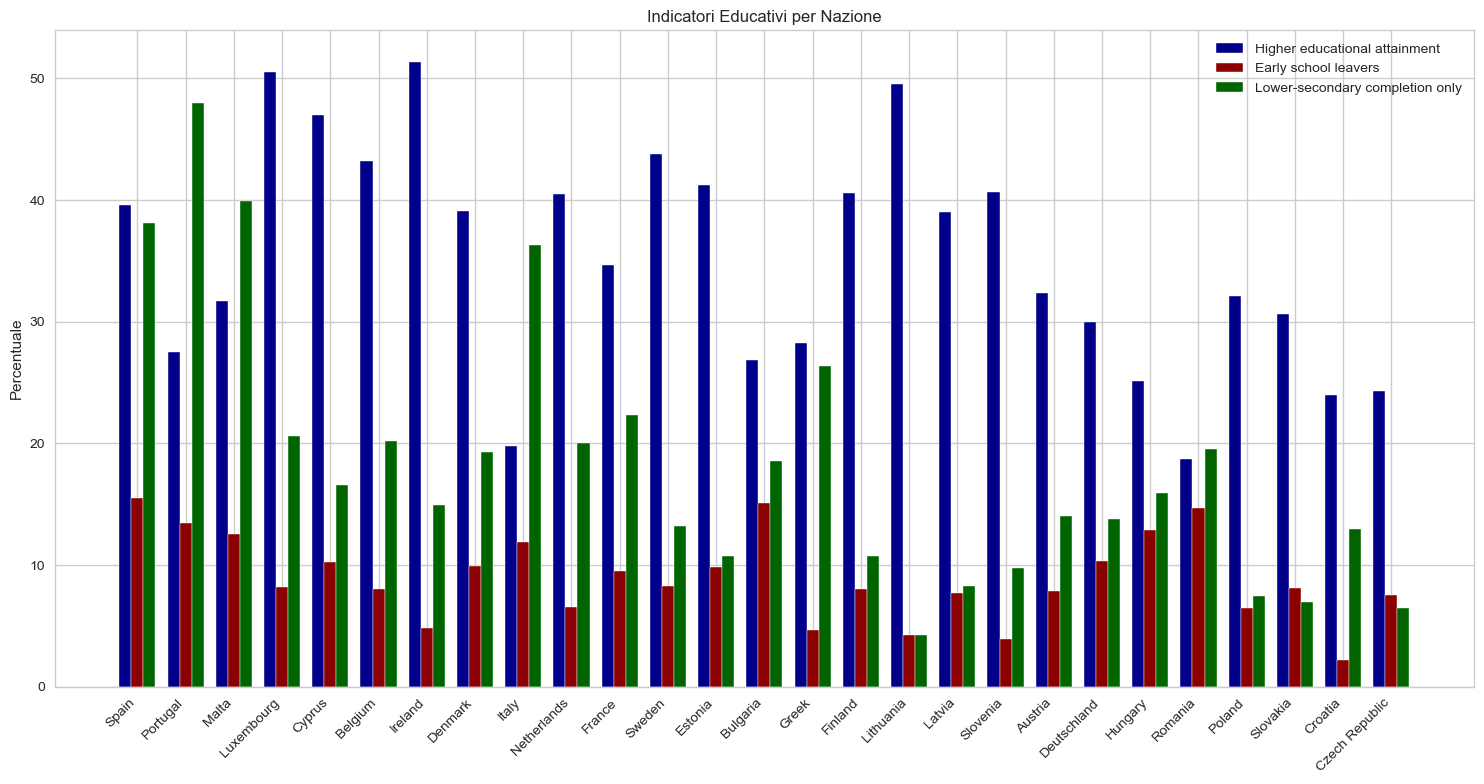

In [50]:
education_means = df.groupby('Nation')[['Higher educational attainment',
                                             'Early school leavers',
                                             'Lower-secondary completion only']].mean()

education_means['Total'] = education_means.sum(axis=1)
education_means = education_means.sort_values('Total', ascending=False)
education_means = education_means.drop('Total', axis=1)

# Graph creation
fig, ax = plt.subplots(figsize=(15, 8))

x = np.arange(len(education_means.index))
width = 0.25

rects1 = ax.bar(x - width, education_means['Higher educational attainment'], 
                width, label='Higher educational attainment', color='darkblue')
rects2 = ax.bar(x, education_means['Early school leavers'], 
                width, label='Early school leavers', color='darkred')
rects3 = ax.bar(x + width, education_means['Lower-secondary completion only'], 
                width, label='Lower-secondary completion only', color='darkgreen')

ax.set_ylabel('Percentuale')
ax.set_title('Indicatori Educativi per Nazione')
ax.set_xticks(x)
ax.set_xticklabels(education_means.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

## Relationship between low achievements on basic education variables

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

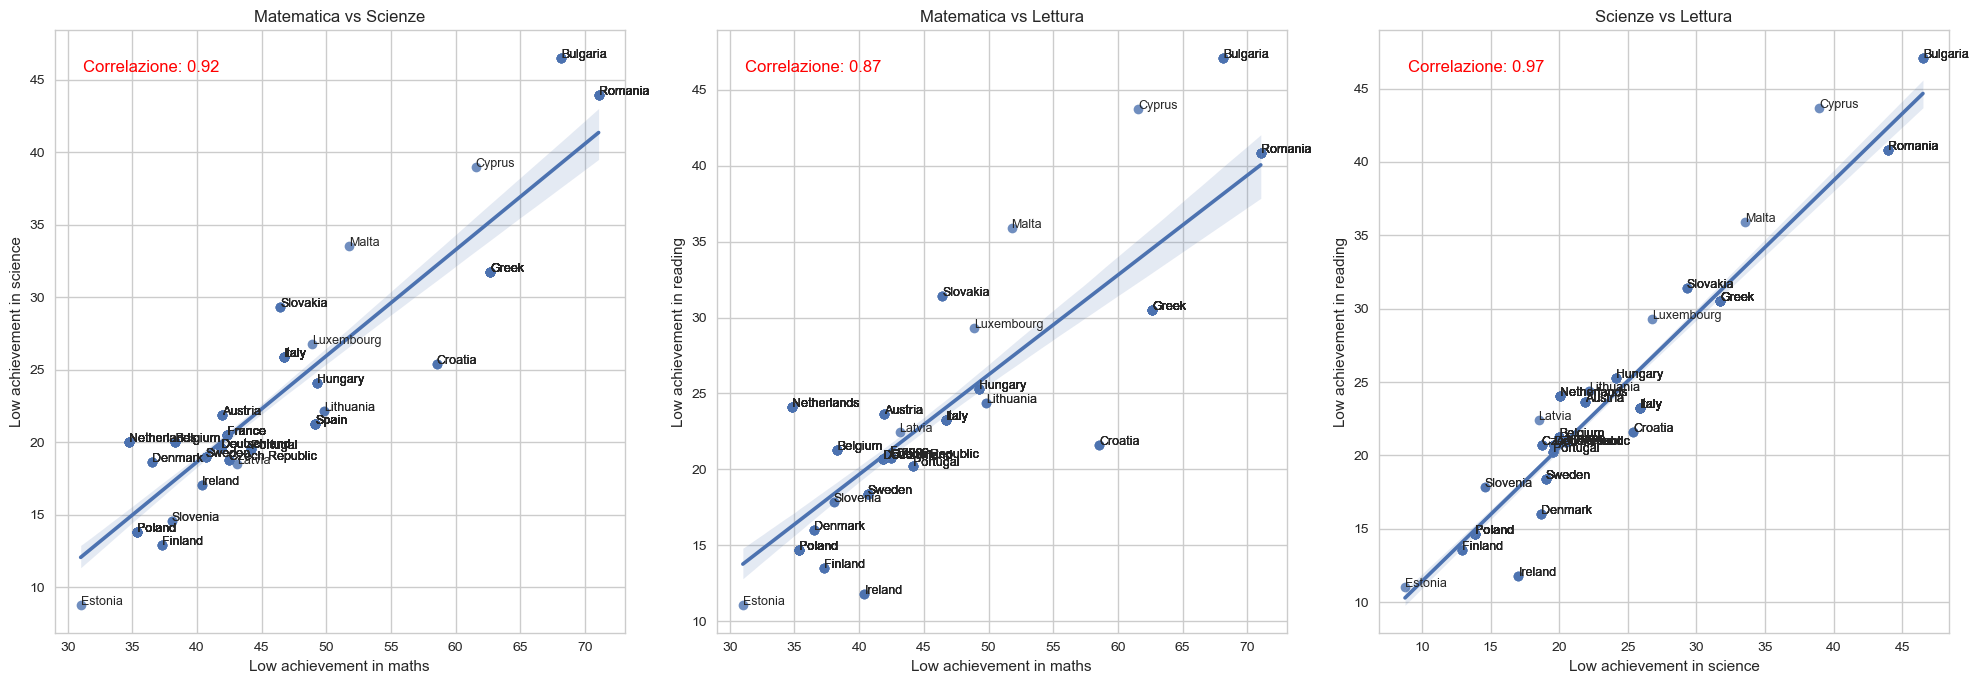

In [52]:
# 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

# First scatterplot: Maths vs Science
sns.regplot(data=df, x='Low achievement in maths (15-year-olds)', y='Low achievement in science (15-year-olds)', ax=ax1)
ax1.set_title('Matematica vs Scienze')
ax1.set_xlabel('Low achievement in maths')
ax1.set_ylabel('Low achievement in science')

# Correlation
corr1 = df['Low achievement in maths (15-year-olds)'].corr(df['Low achievement in science (15-year-olds)'])
ax1.annotate(f'Correlazione: {corr1:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=12, color='red')

# Nations
for i in range(len(df)):
    ax1.text(df['Low achievement in maths (15-year-olds)'][i], df['Low achievement in science (15-year-olds)'][i], df['Nation'][i], fontsize=9)

# Second scatterplot: Maths vs Reading
sns.regplot(data=df, x='Low achievement in maths (15-year-olds)', y='Low achievement in reading (15-year-olds)', ax=ax2)
ax2.set_title('Matematica vs Lettura')
ax2.set_xlabel('Low achievement in maths')
ax2.set_ylabel('Low achievement in reading')

# Correlation
corr2 = df['Low achievement in maths (15-year-olds)'].corr(df['Low achievement in reading (15-year-olds)'])
ax2.annotate(f'Correlazione: {corr2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=12, color='red')

# Nations
for i in range(len(df)):
    ax2.text(df['Low achievement in maths (15-year-olds)'][i], df['Low achievement in reading (15-year-olds)'][i], df['Nation'][i], fontsize=9)

# Third scatterplot: Science vs Reading
sns.regplot(data=df, x='Low achievement in science (15-year-olds)', y='Low achievement in reading (15-year-olds)', ax=ax3)
ax3.set_title('Scienze vs Lettura')
ax3.set_xlabel('Low achievement in science')
ax3.set_ylabel('Low achievement in reading')

# Correlation
corr3 = df['Low achievement in science (15-year-olds)'].corr(df['Low achievement in reading (15-year-olds)'])
ax3.annotate(f'Correlazione: {corr3:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=12, color='red')

# Nations
for i in range(len(df)):
    ax3.text(df['Low achievement in science (15-year-olds)'][i], df['Low achievement in reading (15-year-olds)'][i], df['Nation'][i], fontsize=9)

plt.tight_layout()
plt.show()

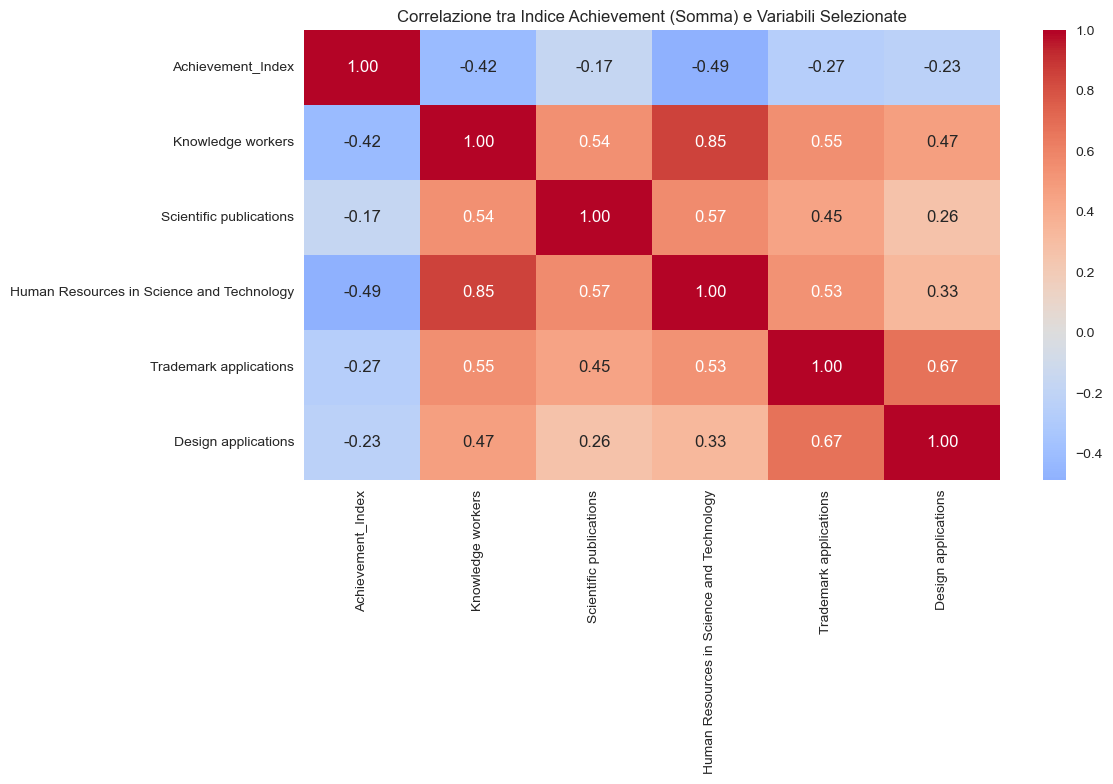

In [100]:
df['Achievement_Index'] = df[[
    'Low achievement in reading (15-year-olds)',
    'Low achievement in maths (15-year-olds)',
    'Low achievement in science (15-year-olds)'
]].sum(axis=1)

variables_of_interest = [
    'Achievement_Index',
    'Knowledge workers',
    'Scientific publications',
    'Human Resources in Science and Technology',
    'Trademark applications',
    'Design applications'
]

correlation_matrix = df[variables_of_interest].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f'
)
plt.title('Correlazione tra Indice Achievement (Somma) e Variabili Selezionate')
plt.tight_layout()
plt.show()


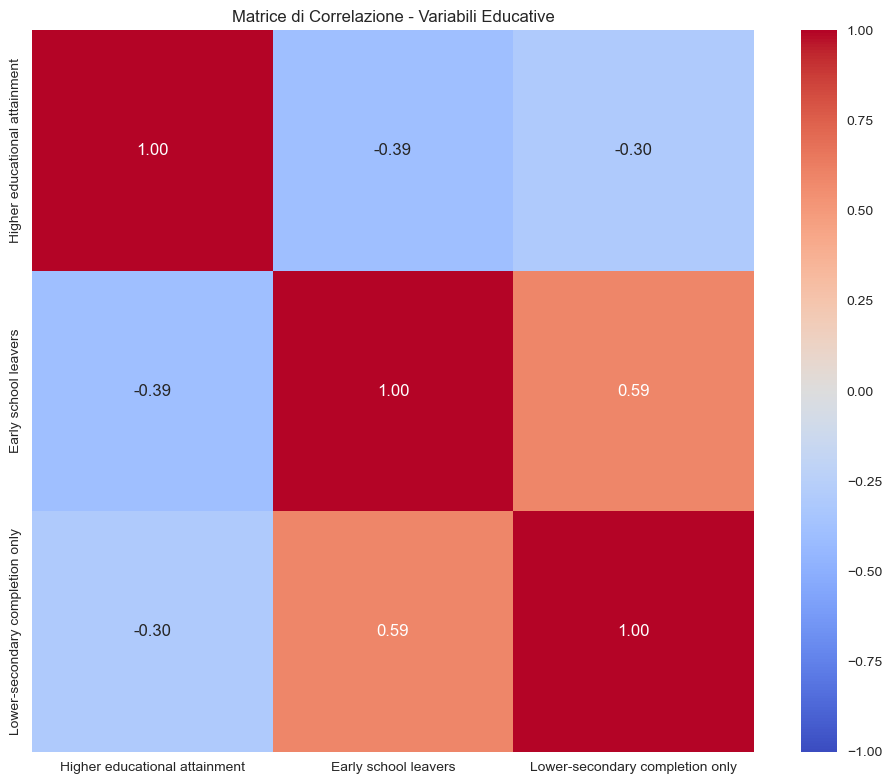

In [105]:
education_vars = [
    'Higher educational attainment',
    'Early school leavers',
    'Lower-secondary completion only'
]

correlation_matrix = df[education_vars].corr()

# Creazione heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Mostra i valori numerici
    cmap='coolwarm',  # Schema colori
    center=0,  # Centro della scala colori
    fmt='.2f',  # Formato numerico
    square=True,  # Celle quadrate
    vmin=-1,  # Minimo valore scala
    vmax=1   # Massimo valore scala
)

plt.title('Matrice di Correlazione - Variabili Educative')
plt.tight_layout()
plt.show()

# EMPLOYMENT

## Employment and unemployment rates

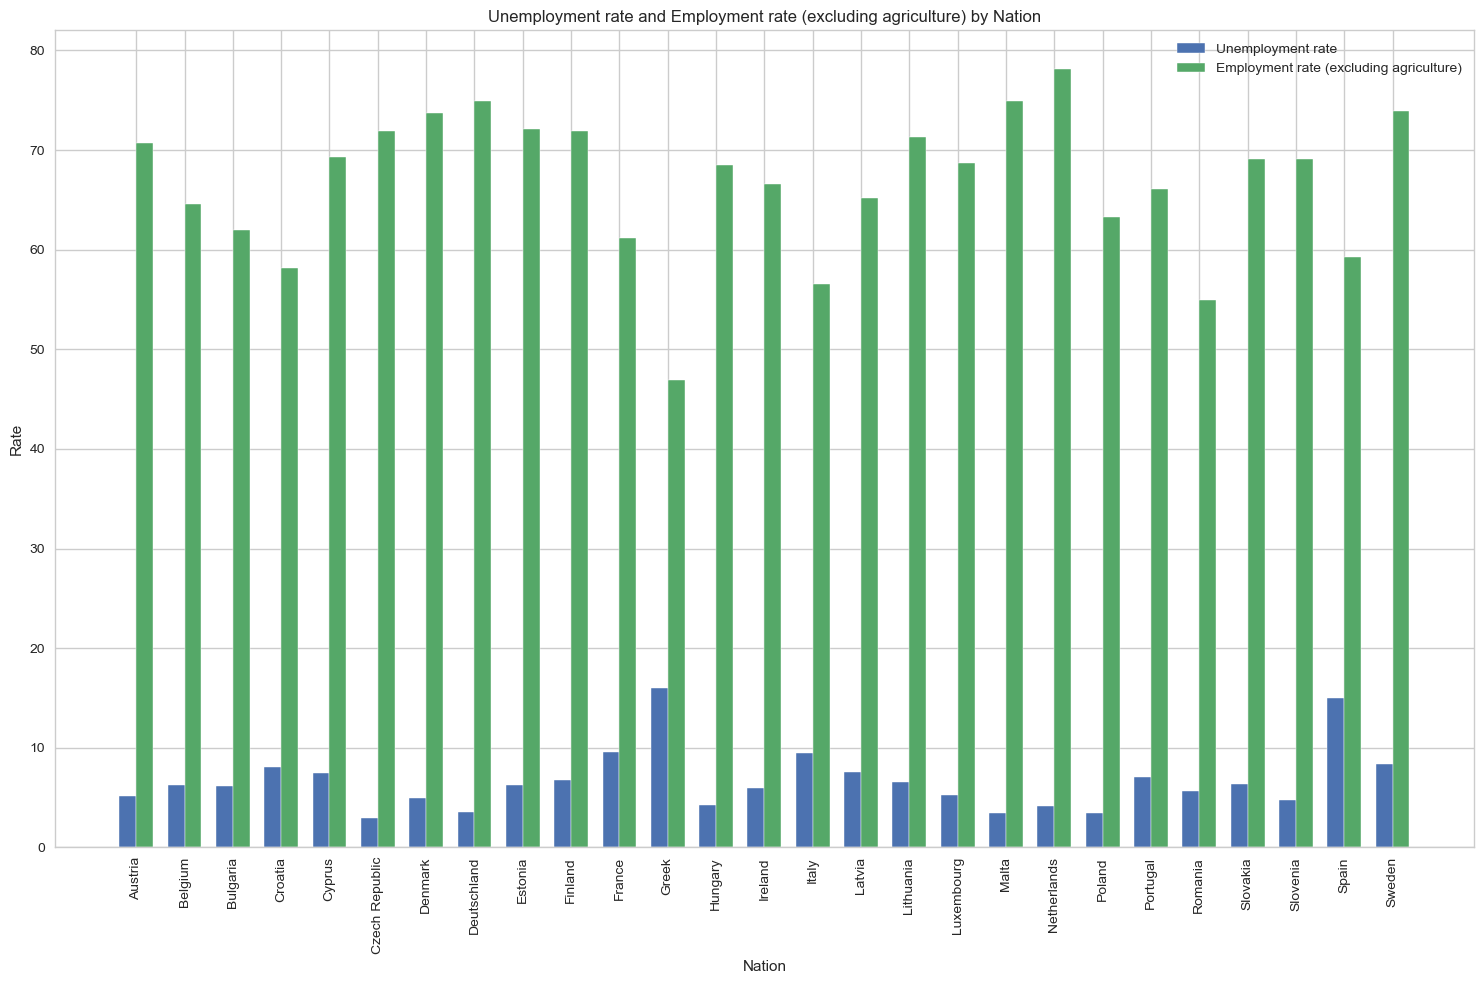

In [53]:
grouped_df = df.groupby('Nation')[['Unemployment rate', 'Employment rate (excluding agriculture)']].mean().reset_index()

# Bar chart
fig, ax = plt.subplots(figsize=(15, 10))

bar_width = 0.35

index = range(len(grouped_df))

bar1 = plt.bar(index, grouped_df['Unemployment rate'], bar_width, label='Unemployment rate')
bar2 = plt.bar([i + bar_width for i in index], grouped_df['Employment rate (excluding agriculture)'], bar_width, label='Employment rate (excluding agriculture)')

plt.xlabel('Nation')
plt.ylabel('Rate')
plt.title('Unemployment rate and Employment rate (excluding agriculture) by Nation')
plt.xticks([i + bar_width / 2 for i in index], grouped_df['Nation'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

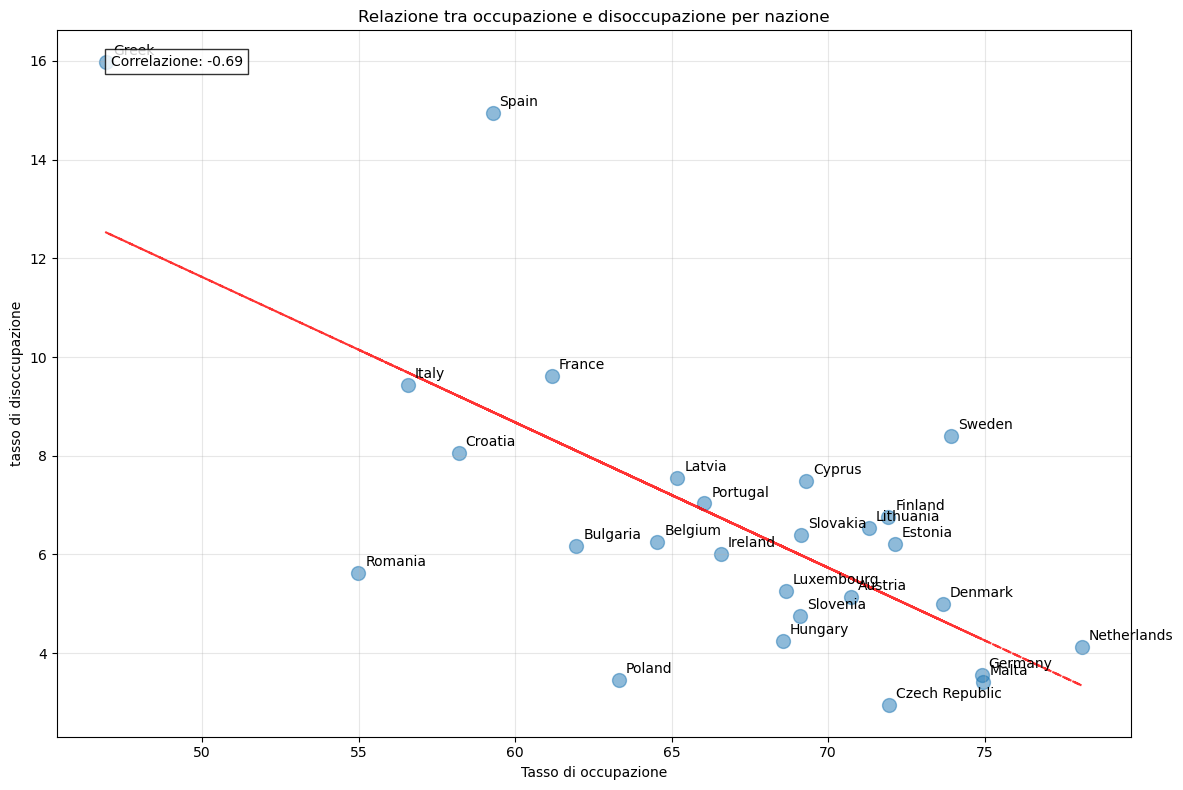

In [16]:
unemployment_rate = df.groupby('Nation')['Unemployment rate'].mean()
employment_rate = df.groupby('Nation')['Employment rate (excluding agriculture)'].mean()


plot_data = pd.DataFrame({
    'Unemployment': unemployment_rate,
    'Employment': employment_rate
})

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_data['Employment'], 
           plot_data['Unemployment'], 
           alpha=0.5, 
           s=100)

# linear regression
z = np.polyfit(plot_data['Employment'], plot_data['Unemployment'], 1)
p = np.poly1d(z)
plt.plot(plot_data['Employment'], 
         p(plot_data['Employment']), 
         "r--", 
         alpha=0.8)

for idx in plot_data.index:
    plt.annotate(idx, 
                (plot_data.loc[idx, 'Employment'], 
                 plot_data.loc[idx, 'Unemployment']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=10)
    
plt.title('Relazione tra occupazione e disoccupazione per nazione')
plt.xlabel('Tasso di occupazione')
plt.ylabel('tasso di disoccupazione')

# Correlation
correlation = plot_data['Employment'].corr(plot_data['Unemployment'])
plt.text(0.05, 0.95, f'Correlazione: {correlation:.2f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Gender balance employment and unemployment

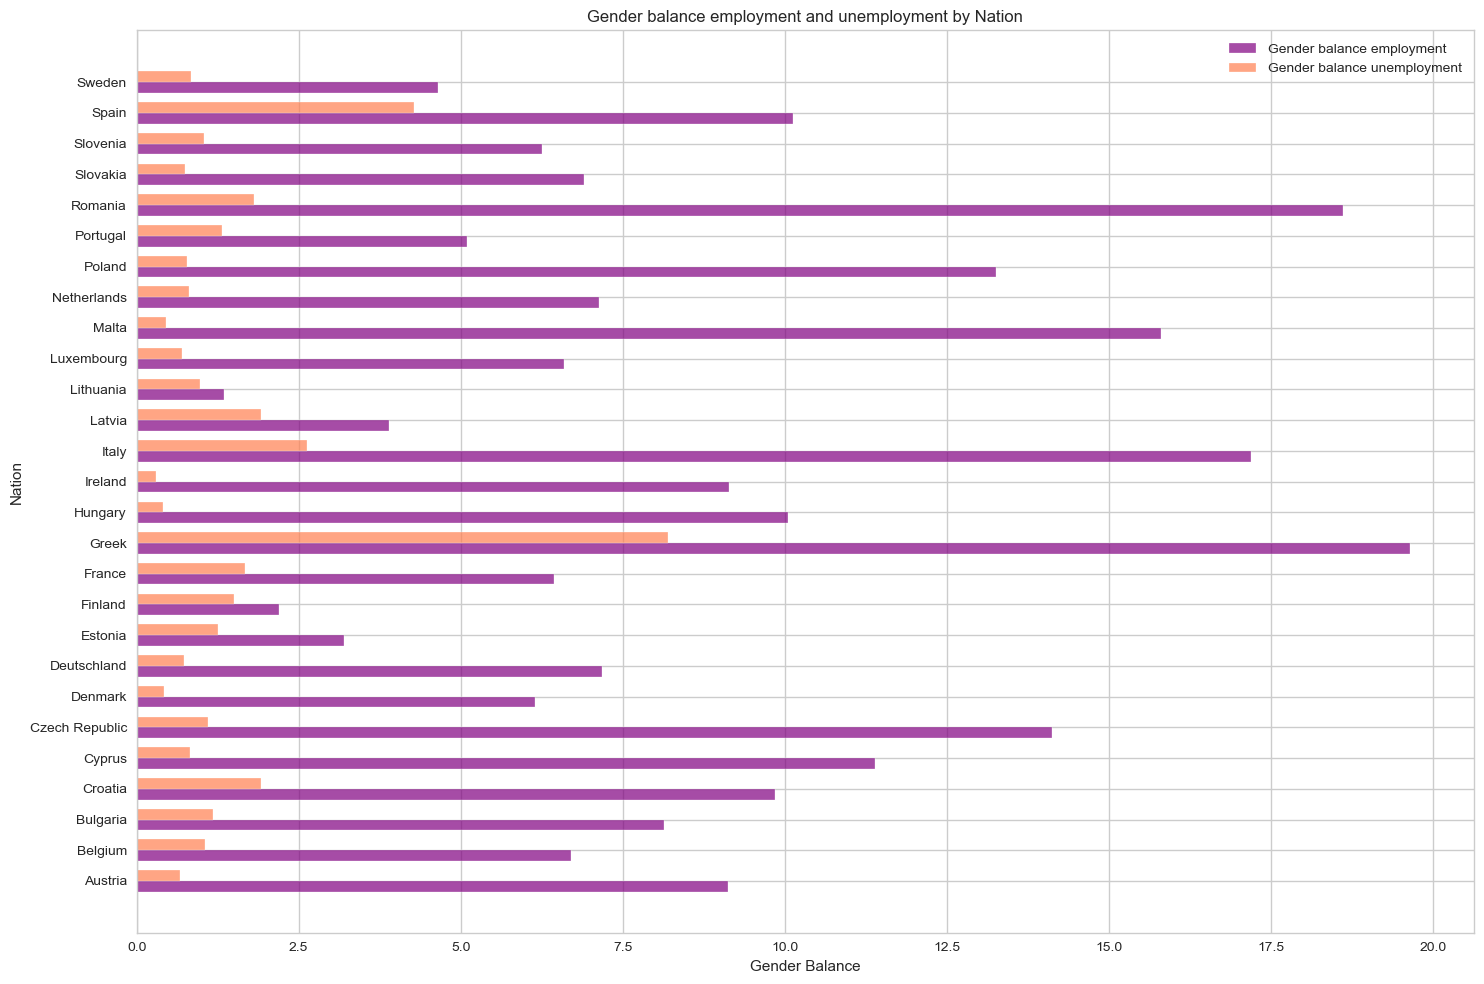

In [73]:
grouped_df = df.groupby('Nation')[['Gender balance employment', 'Gender balance unemployment']].mean().reset_index()

fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.35
index = range(len(grouped_df))

bar1 = plt.barh(index, 
                grouped_df['Gender balance employment'], 
                bar_width, 
                label='Gender balance employment',
                color='purple',  # Nuovo colore per occupazione
                alpha=0.7)

bar2 = plt.barh([i + bar_width for i in index], 
                grouped_df['Gender balance unemployment'], 
                bar_width, 
                label='Gender balance unemployment',
                color='coral',  # Nuovo colore per disoccupazione
                alpha=0.7)

plt.ylabel('Nation')
plt.xlabel('Gender Balance')
plt.title('Gender balance employment and unemployment by Nation')
plt.yticks([i + bar_width / 2 for i in index], grouped_df['Nation'])
plt.legend()

plt.tight_layout()
plt.show()

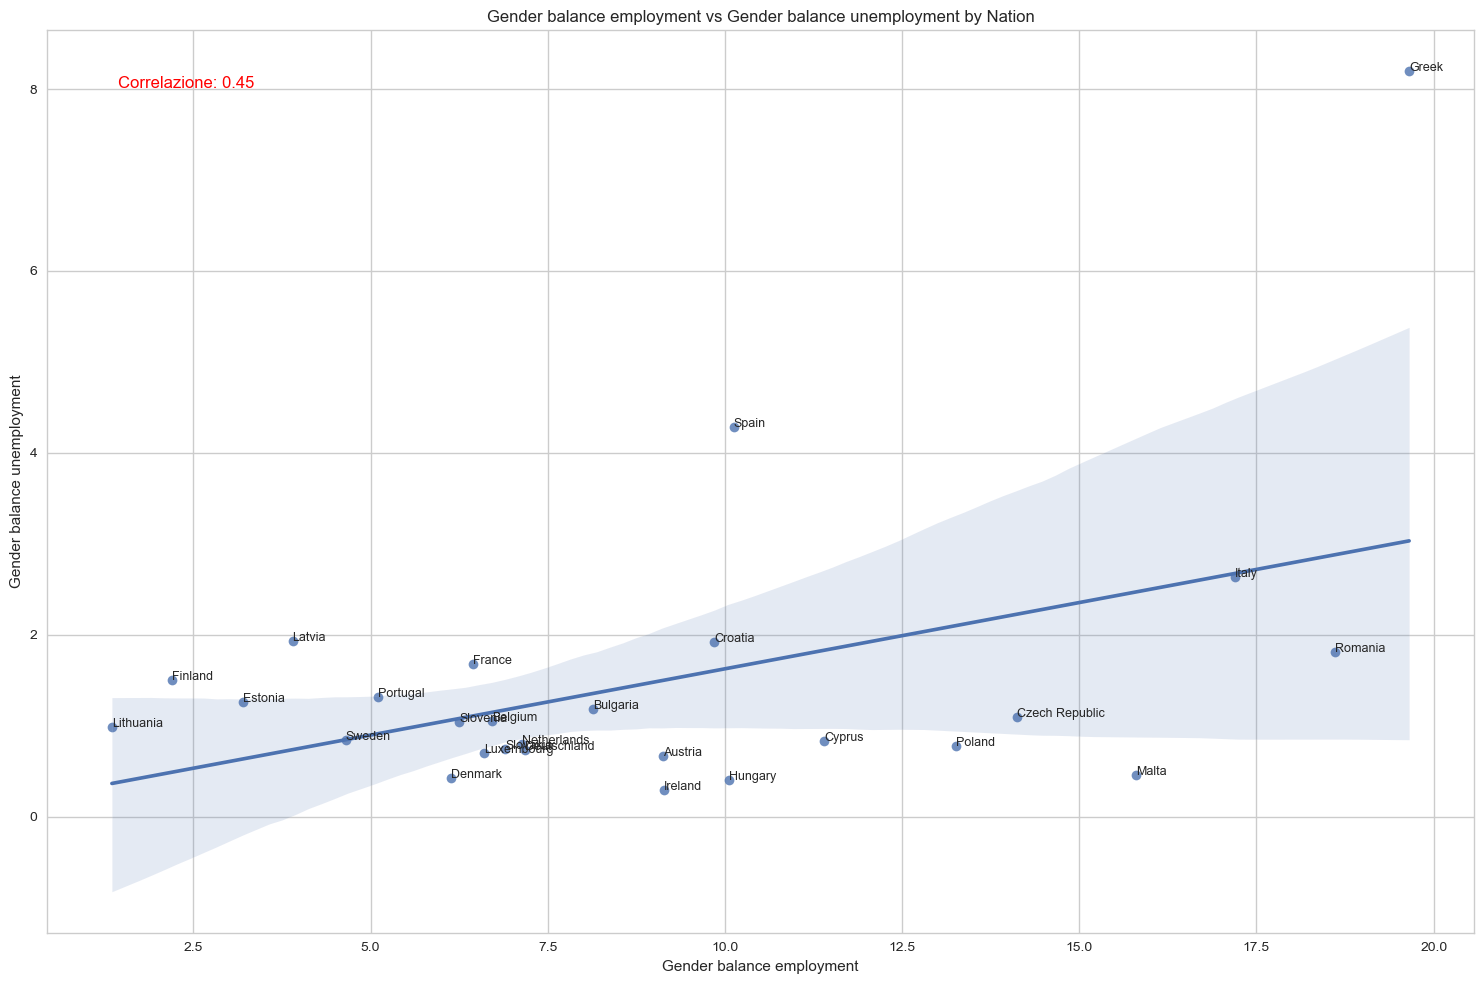

In [55]:
grouped_df = df.groupby('Nation')[['Gender balance employment', 'Gender balance unemployment']].mean().reset_index()

# Scatter plot
plt.figure(figsize=(15, 10))
sns.regplot(data=grouped_df, x='Gender balance employment', y='Gender balance unemployment')

# Nation names
for i in range(len(grouped_df)):
    plt.text(grouped_df['Gender balance employment'][i], grouped_df['Gender balance unemployment'][i], grouped_df['Nation'][i], fontsize=9)

# Correlation
corr = grouped_df['Gender balance employment'].corr(grouped_df['Gender balance unemployment'])
plt.annotate(f'Correlazione: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=12, color='red')

plt.xlabel('Gender balance employment')
plt.ylabel('Gender balance unemployment')
plt.title('Gender balance employment vs Gender balance unemployment by Nation')

plt.tight_layout()
plt.show()

## Long term unemployment

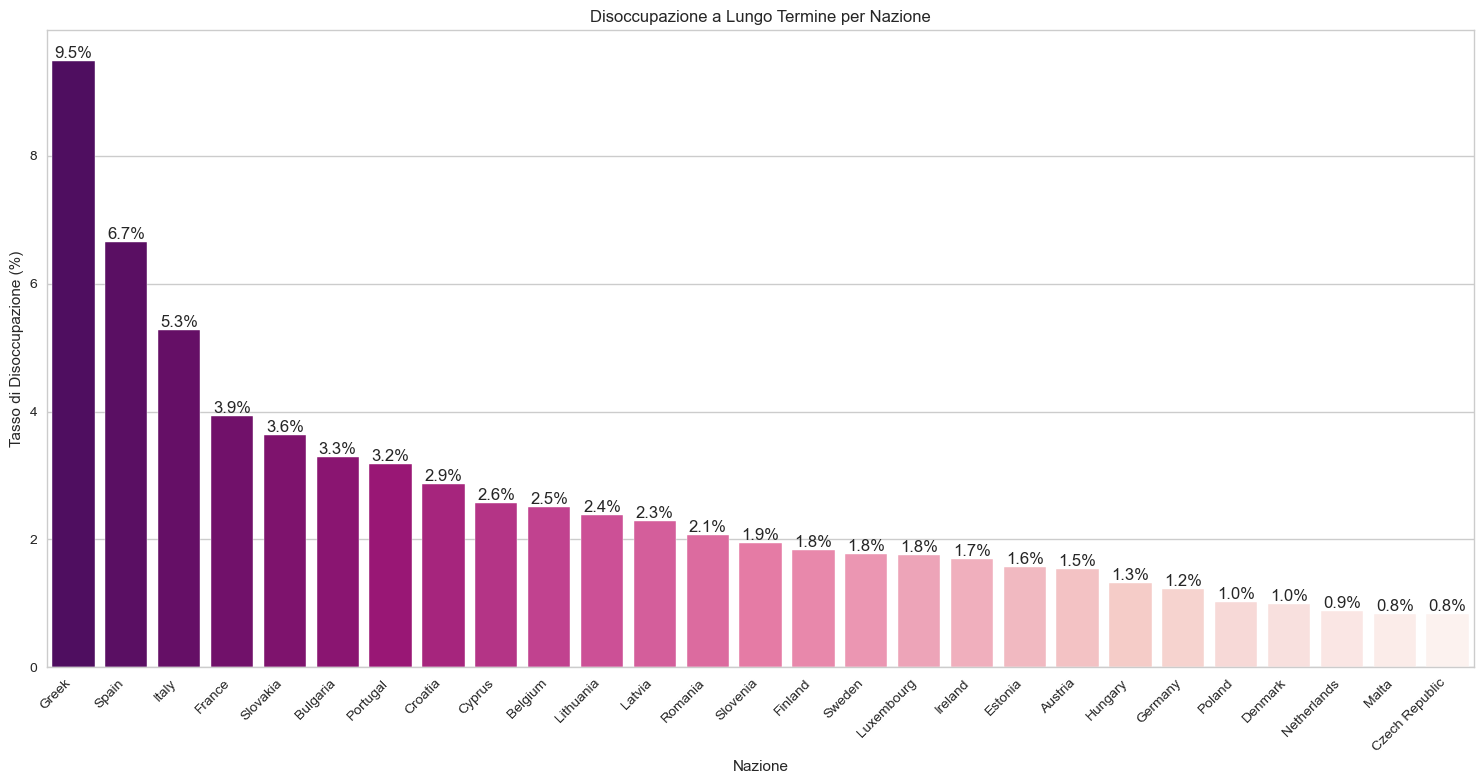

In [104]:
unemployment = df.groupby('Nation')['Long-term unemployment'].mean().sort_values(ascending=False)

# Creazione istogramma
plt.figure(figsize=(15, 8))
sns.barplot(x=unemployment.index, 
            y=unemployment.values,
            palette='RdPu_r')

# Personalizzazione
plt.title('Disoccupazione a Lungo Termine per Nazione')
plt.xlabel('Nazione')
plt.ylabel('Tasso di Disoccupazione (%)')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(unemployment.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### NEET rate

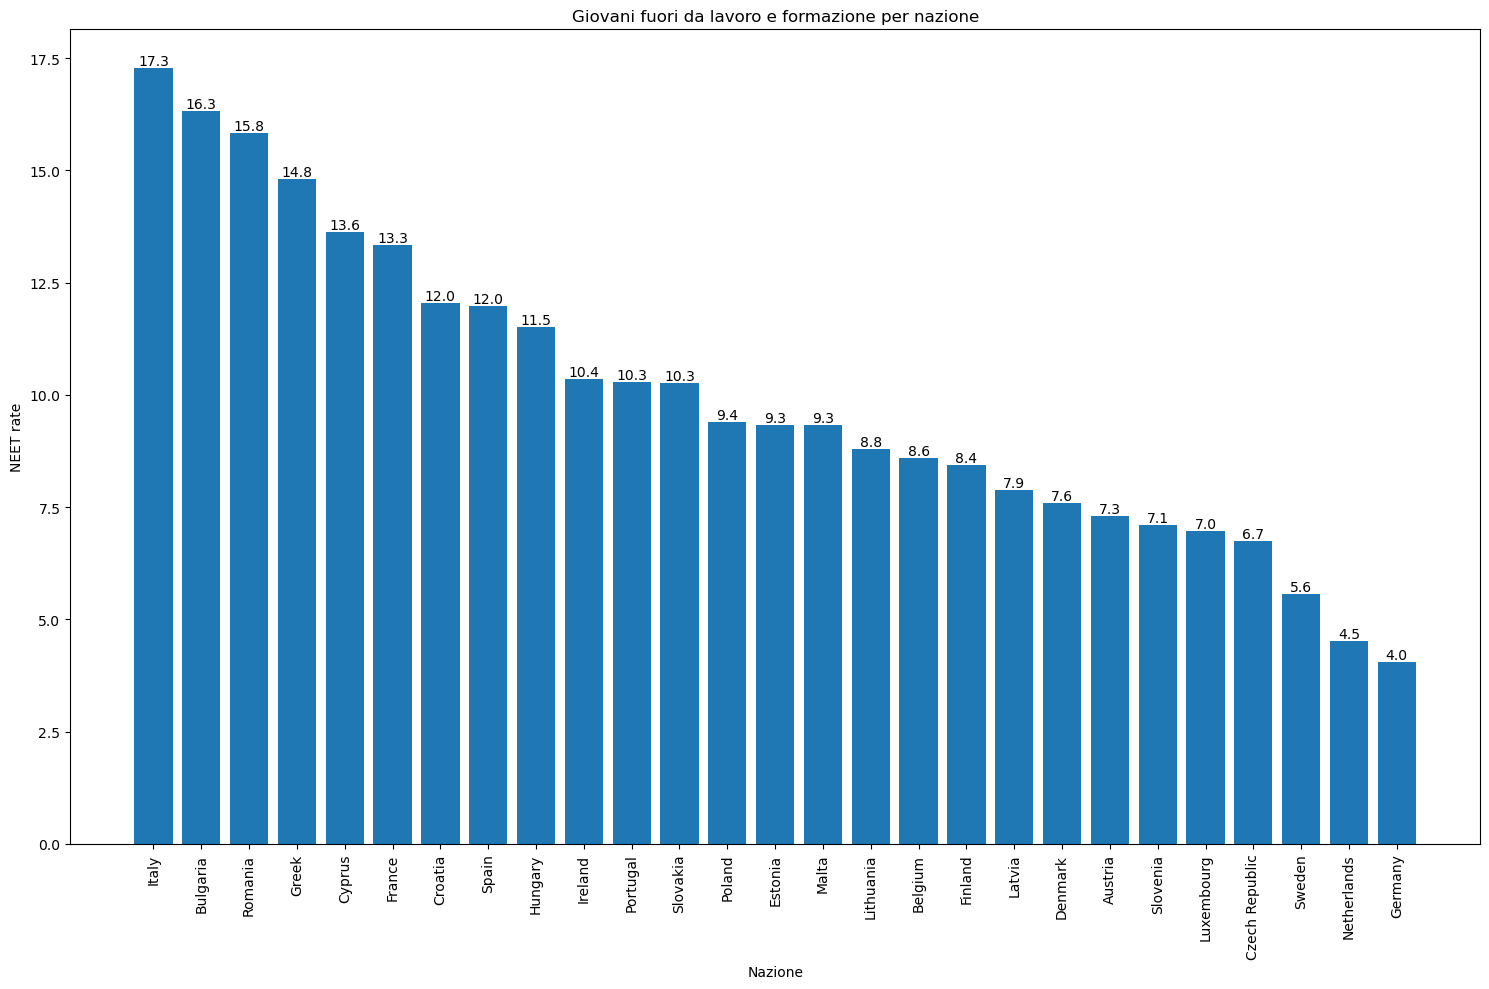

In [15]:
grouped_df = df.groupby('Nation')['NEET rate'].mean().sort_values(ascending=False)

# Histogram
plt.figure(figsize=(15, 10))
bars = plt.bar(range(len(grouped_df)), grouped_df.values)

plt.xticks(range(len(grouped_df)), grouped_df.index, rotation=90)
plt.xlabel('Nazione')
plt.ylabel('NEET rate')
plt.title('Giovani fuori da lavoro e formazione per nazione')

for i, v in enumerate(grouped_df.values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# INNOVATION

### Patent Application

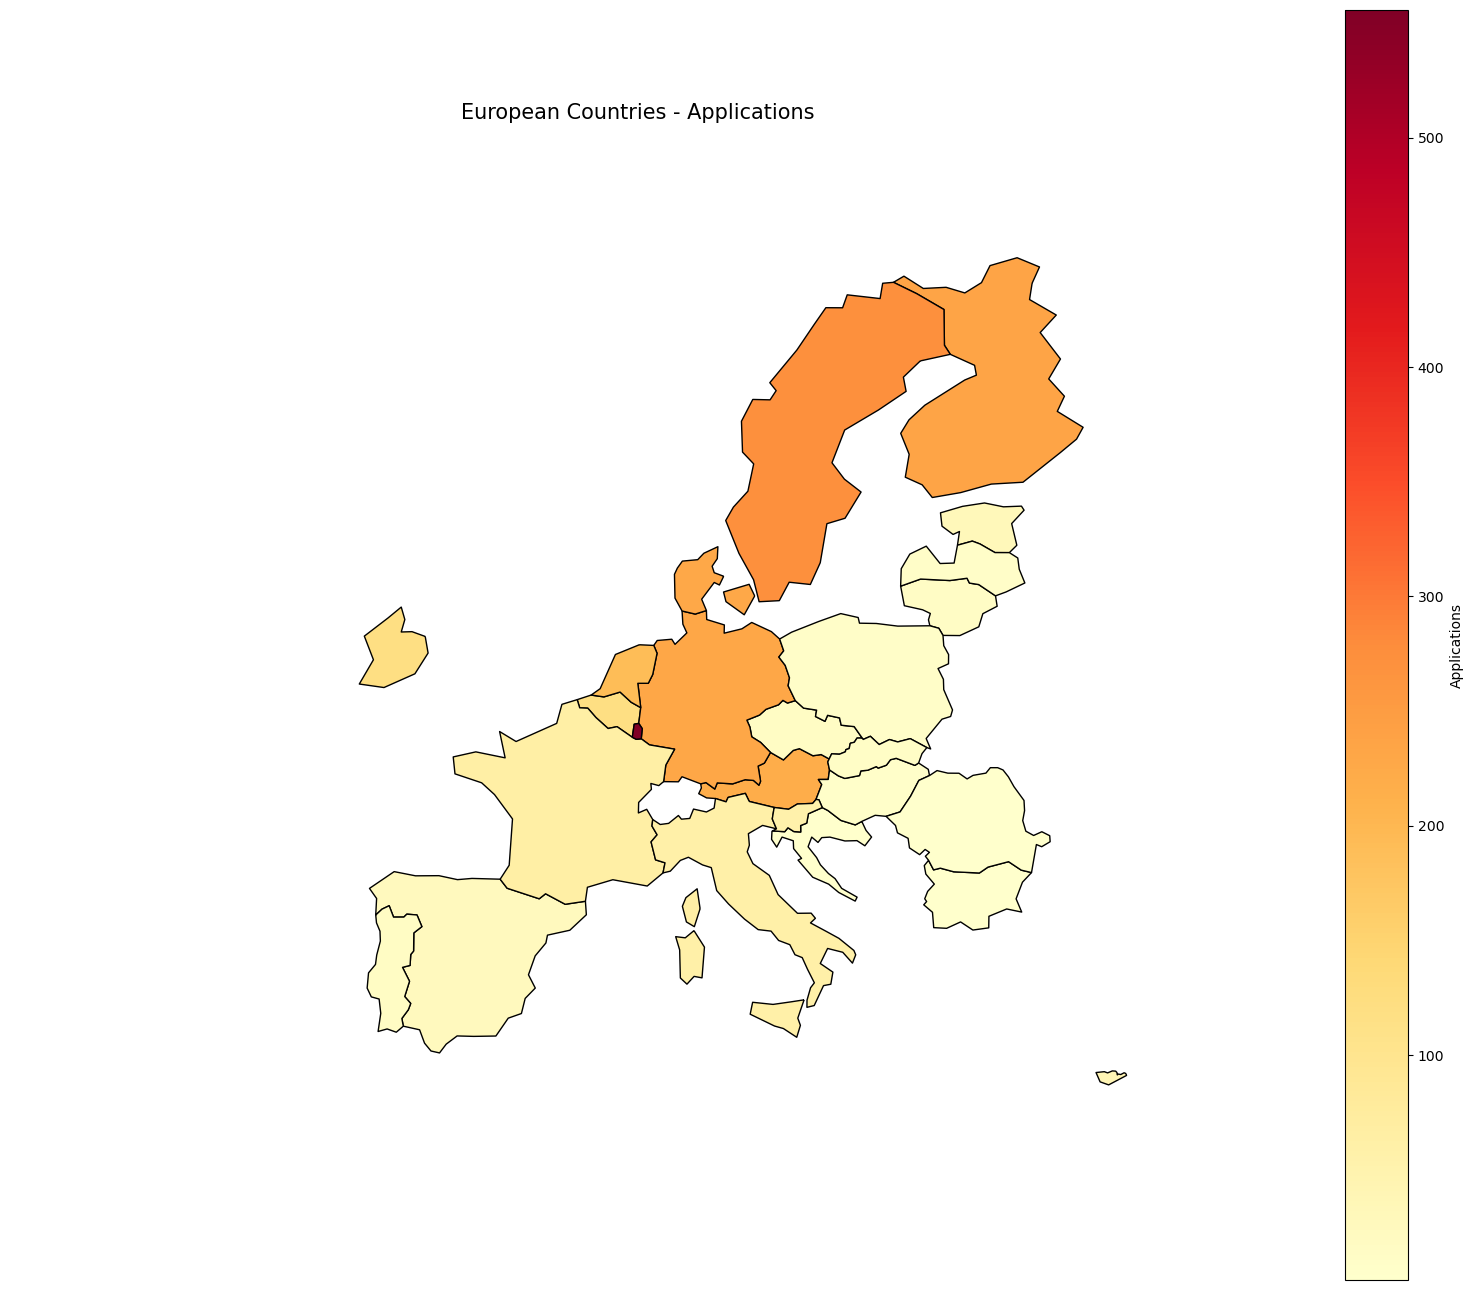

In [7]:
url_world = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
response = requests.get(url_world)
with tempfile.NamedTemporaryFile(suffix='.geojson') as tmp:
    tmp.write(response.content)
    tmp.flush()
    world = gpd.read_file(tmp.name)

# Second step: filtriamo i Paesi Europei + Cipro e Malta, escludendo la Russia
europe = world[((world['continent'] == 'Europe') | 
               (world['admin'].isin(['Cyprus', 'Malta']))) & 
              (world['admin'] != 'Russia')]

df_agg = df.groupby("Nation", as_index=False)['Total patent applications'].mean()

# Third step: Uniamo il GeoDataFrame europe con df 
europe_merged = europe.merge(df_agg, how='left', left_on='admin', right_on='Nation')

fig, ax = plt.subplots(1, 1, figsize=(16, 13))

# Plot principale
europe_merged.plot(
    column='Total patent applications',  
    cmap='YlOrRd',  
    legend=True,
    edgecolor='black',
    ax=ax,
    legend_kwds={'label': 'Applications',
                 'orientation': 'vertical'}
)

ax.set_title("European Countries - Applications", fontsize=15, pad=19)
ax.axis('off')  

ax.set_xlim([-30, 42])  # Longitudine
ax.set_ylim([32, 75])   # Latitudine 

plt.tight_layout()
plt.show()

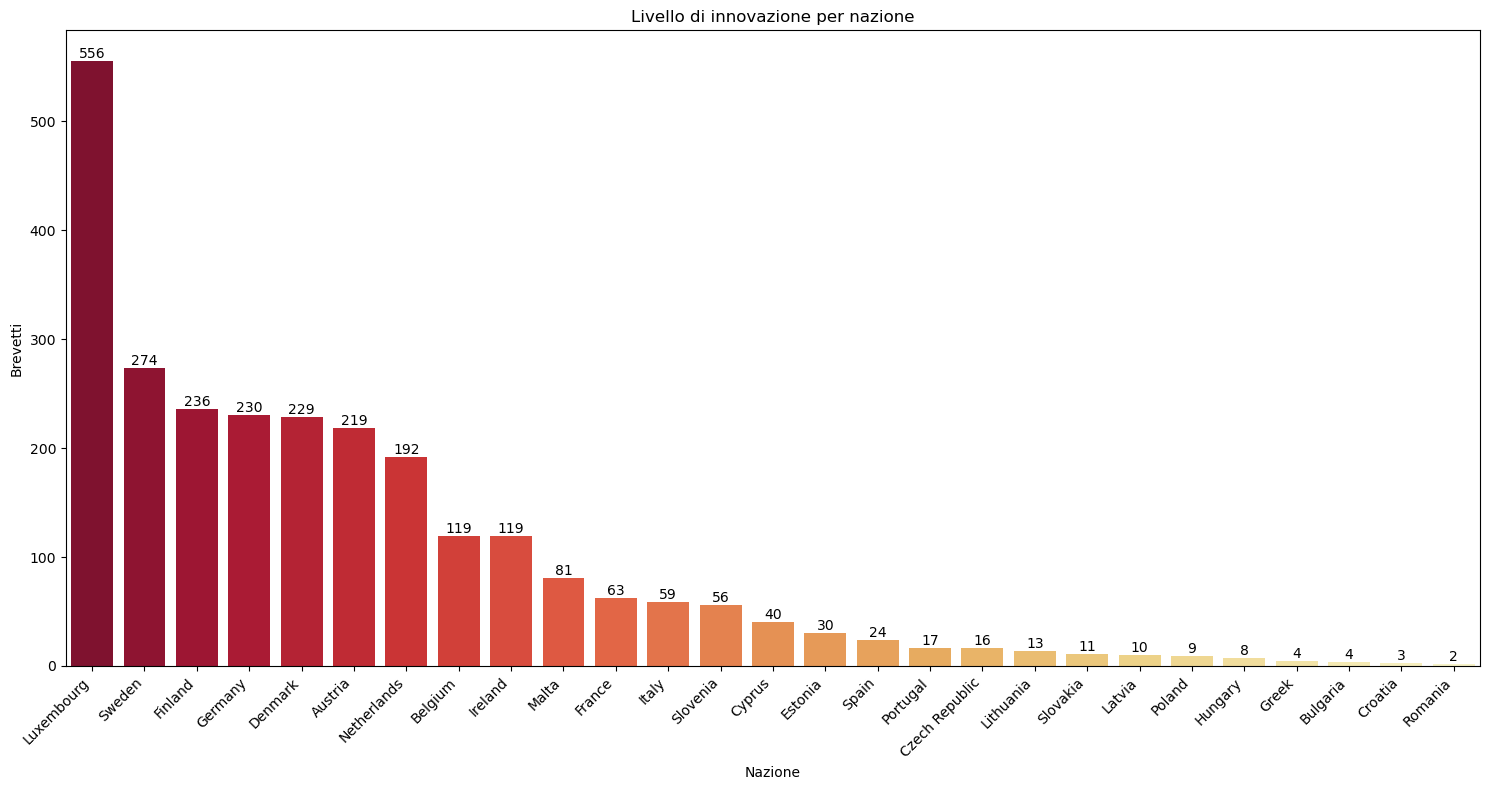

In [11]:
applications = df.groupby('Nation')['Total patent applications'].mean().sort_values(ascending=False)

# Histogram
plt.figure(figsize=(15, 8))
sns.barplot(x=applications.index, 
            y=applications.values,
            palette='YlOrRd_r')

plt.title('Livello di innovazione per nazione')
plt.xlabel('Nazione')
plt.ylabel('Brevetti')
plt.xticks(rotation=45, horizontalalignment='right')

for i, v in enumerate(applications.values):
    plt.text(i, v, f'{v:.0f}', horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()

### Human resources in Science and Technology with Knowledge workers

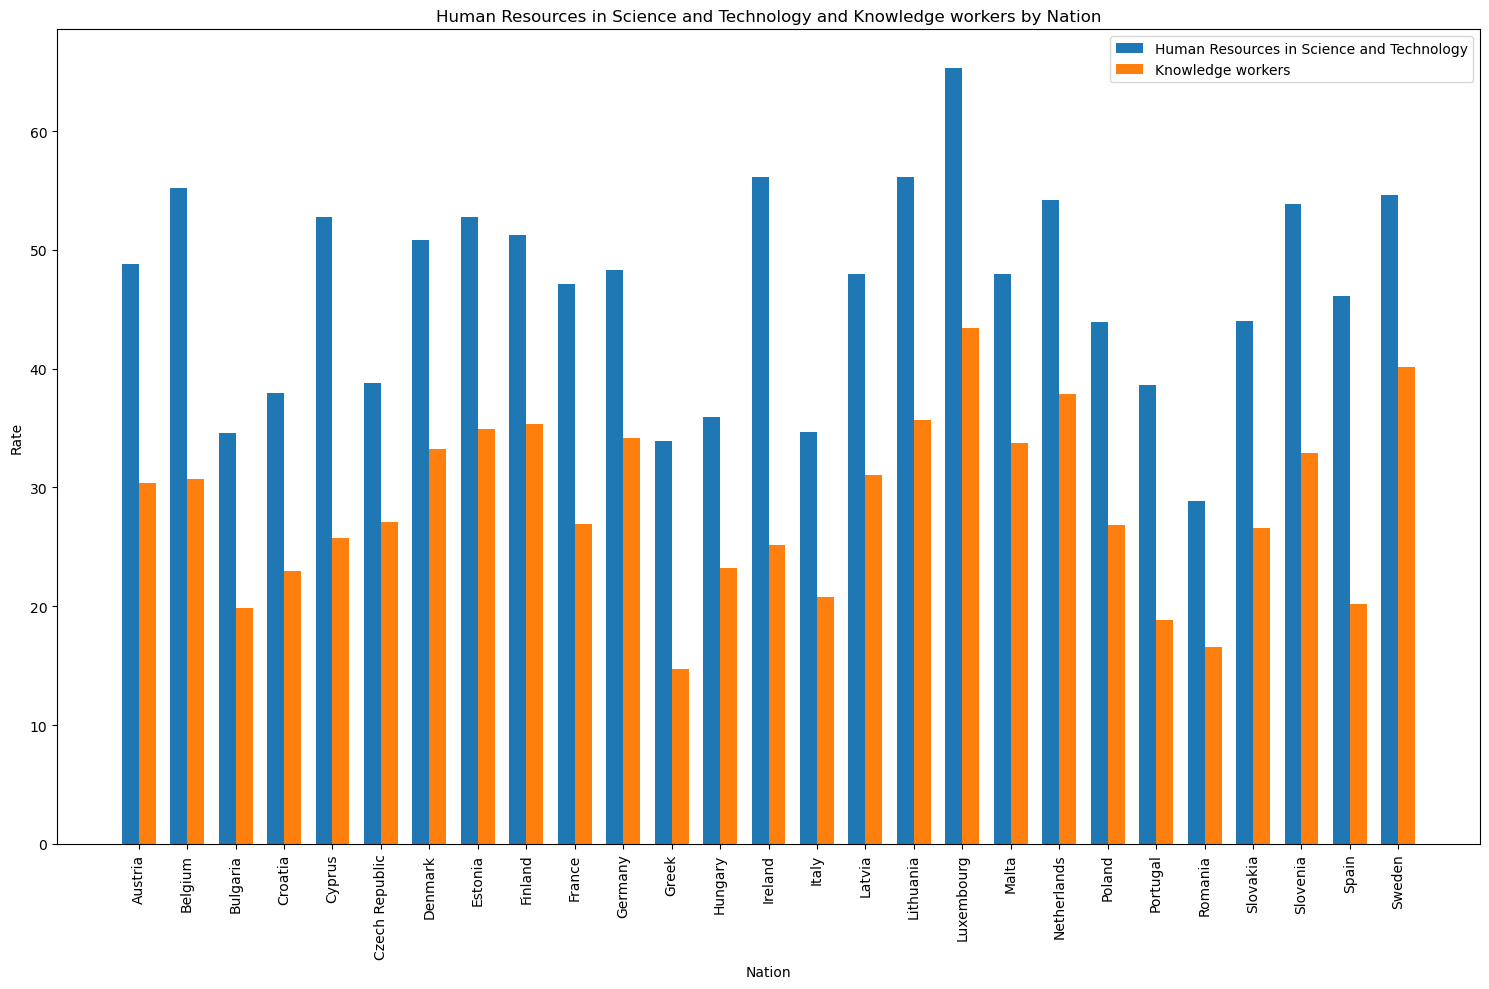

In [8]:
grouped_df = df.groupby('Nation')[['Human Resources in Science and Technology', 'Knowledge workers']].mean().reset_index()

# Bar chart
fig, ax = plt.subplots(figsize=(15, 10))

bar_width = 0.35

index = range(len(grouped_df))

bar1 = plt.bar(index, grouped_df['Human Resources in Science and Technology'], bar_width, label='Human Resources in Science and Technology')
bar2 = plt.bar([i + bar_width for i in index], grouped_df['Knowledge workers'], bar_width, label='Knowledge workers')

plt.xlabel('Nation')
plt.ylabel('Rate')
plt.title('Human Resources in Science and Technology and Knowledge workers by Nation')
plt.xticks([i + bar_width / 2 for i in index], grouped_df['Nation'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

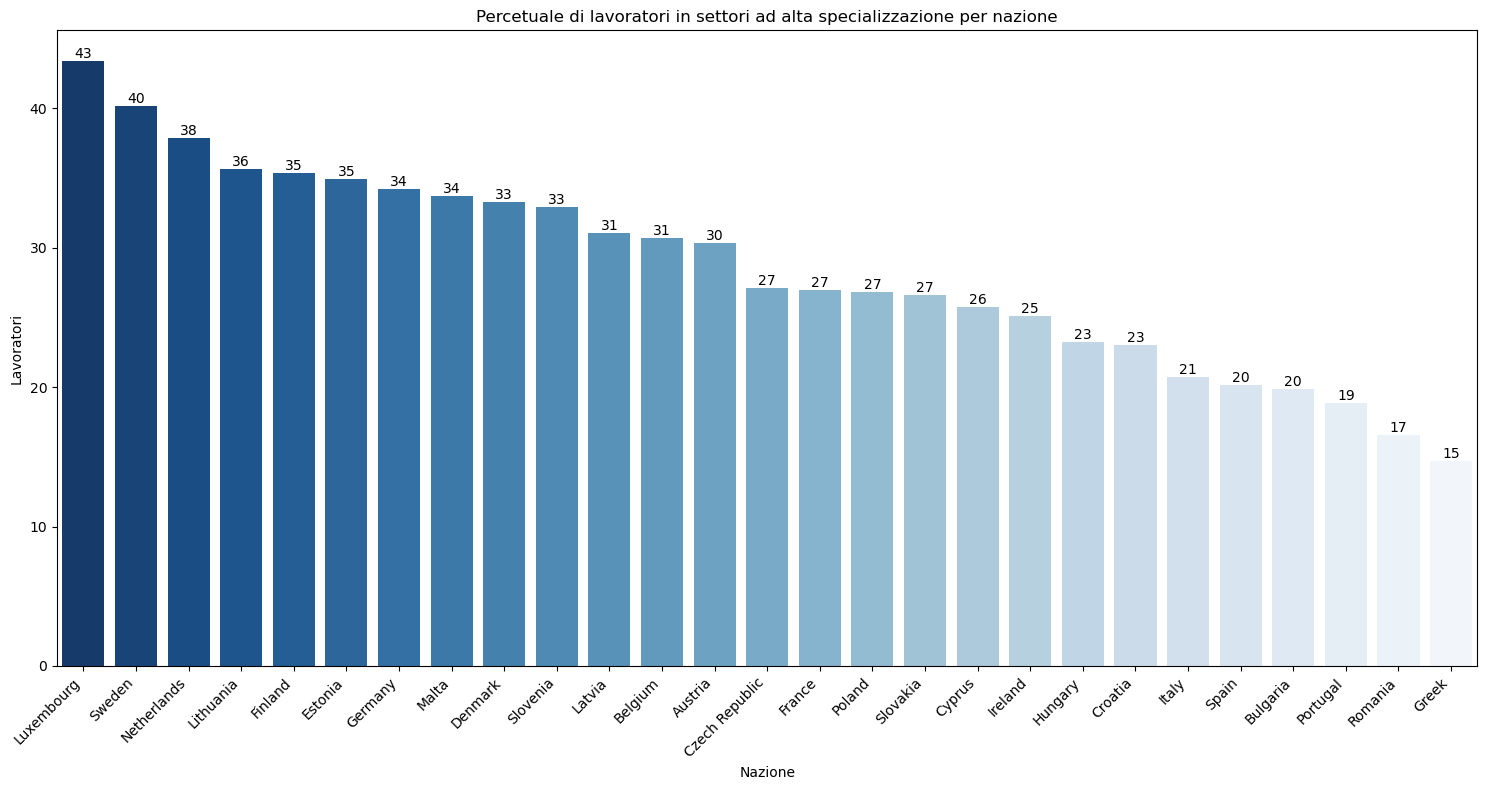

In [10]:
workers = df.groupby('Nation')['Knowledge workers'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=workers.index, 
            y=workers.values,
            palette='Blues_r')

plt.title('Percetuale di lavoratori in settori ad alta specializzazione per nazione')
plt.xlabel('Nazione')
plt.ylabel('Lavoratori')
plt.xticks(rotation=45, horizontalalignment='right')


for i, v in enumerate(workers.values):
    plt.text(i, v, f'{v:.0f}', horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()

### Lifelong Learning

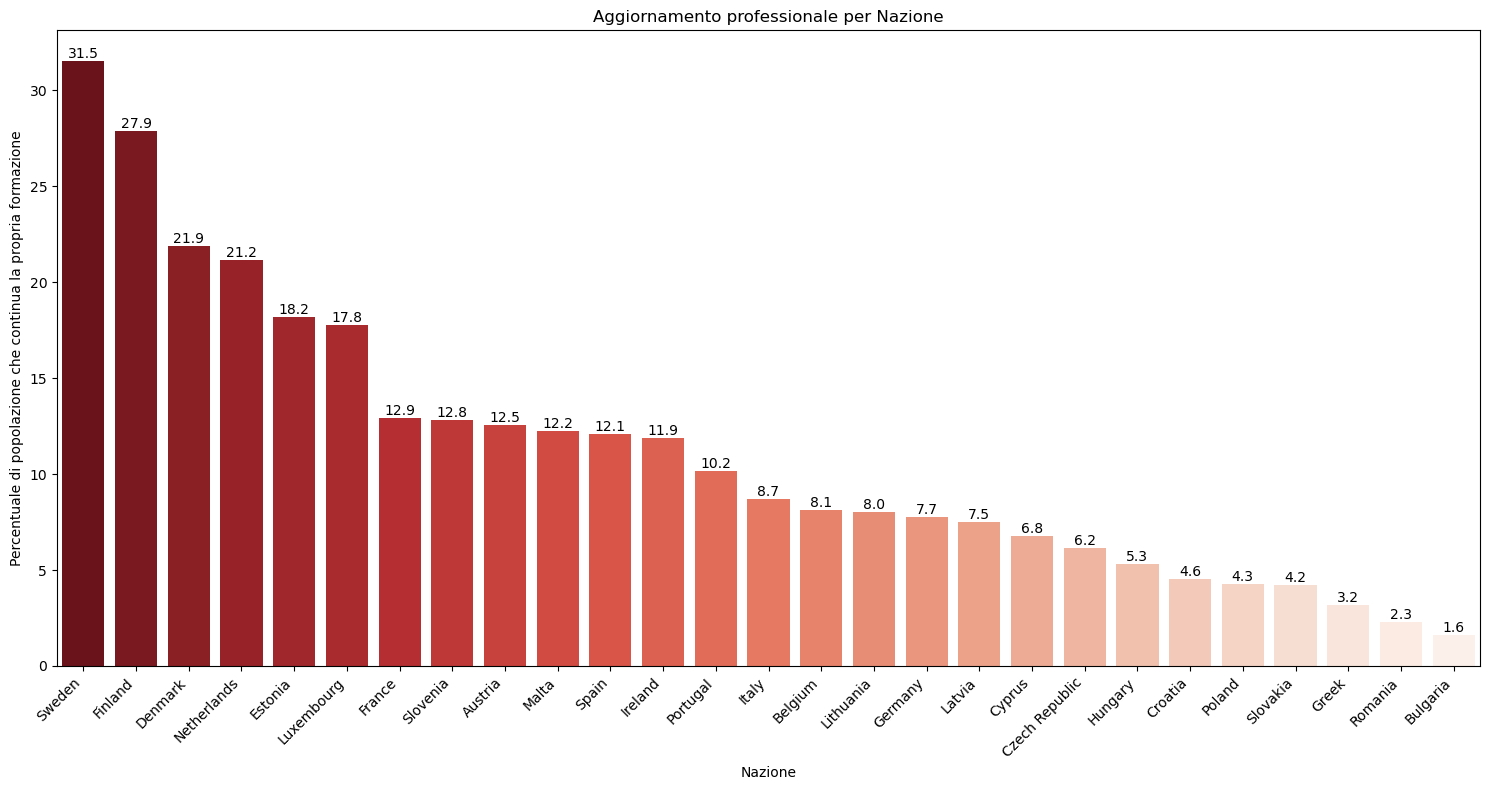

In [9]:
learning = df.groupby('Nation')['Lifelong learning '].mean().sort_values(ascending=False)

# Histogram
plt.figure(figsize=(15, 8))
sns.barplot(x=learning.index, 
            y=learning.values,
            palette='Reds_r')

plt.title('Aggiornamento professionale per Nazione')
plt.xlabel('Nazione')
plt.ylabel('Percentuale di popolazione che continua la propria formazione')
plt.xticks(rotation=45, horizontalalignment='right')

for i, v in enumerate(learning.values):
    plt.text(i, v, f'{v:.1f}', horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()